# **Project Name**    - Zomato Restaurant Clustering and Sentiment Analysis



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Name -**  PATEL YATRI AMULKUMAR

# **Project Summary -**

This project focuses on Zomato, a leading online food delivery and restaurant discovery platform, utilizing two primary datasets: one containing restaurant details and the other capturing user reviews.

The project began with extensive data cleaning and preprocessing to ensure accuracy and consistency across both datasets. Following this, Exploratory Data Analysis (EDA) was conducted to uncover meaningful patterns and gain a deeper understanding of the data's structure and features.

The core analysis included applying K-Means clustering to segment restaurants based on similar characteristics, as well as performing sentiment analysis on user reviews. To enhance interpretability, Latent Dirichlet Allocation (LDA) was used for topic modeling and visualizing sentiment trends. Additionally, the outcomes were compared with supervised learning methods to validate and deepen the insights derived.

In summary, this project provides a comprehensive analysis of Zomato’s restaurant and review data, integrating clustering, sentiment analysis, and visualization techniques to generate actionable insights for strategic decision-making in the food services industry.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Zomato, a major food delivery and restaurant aggregator, wants to better organize its restaurant data using machine learning. The goal is to cluster restaurants based on various features such as average cost, cuisines, ratings, and review activity. This helps in categorizing restaurants with similar profiles, which enhances user navigation and recommendations on the platform.**

1. Dataset 1: Zomato Restaurant's amd Metadata Details
 - This dataset contains details of various restaurants list on Zomato. This database Include restaurant name, links, costs, collections, cuisines, timings.

2.  Dataset 2: Zomato restaurant reviews
  - This dataset contains user reviews for diffrent restaurents on Zomato. It's include review, rating, metadata, time, reviewer.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [29]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from textblob import TextBlob

### Dataset Loading

In [30]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
metadata_path = "/content/drive/MyDrive/Zomato_project/Zomato Restaurant names and Metadata.csv"
reviews_path = "/content/drive/MyDrive/Zomato_project/Zomato Restaurant reviews.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [31]:
# Dataset First Look
metadata = pd.read_csv(metadata_path)
reviews = pd.read_csv(reviews_path)
metadata.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [32]:
reviews.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [33]:
# metadata Dataset Rows & Columns count
rows, columns = metadata.shape
print(f"Number of rows in metadata: {rows}")
print(f"Number of columns in metadata: {columns}")

Number of rows in metadata: 105
Number of columns in metadata: 6


In [34]:
# Reviews Dataset Rows & Columns count
rows, columns = reviews.shape
print(f"Number of rows in metadata: {rows}")
print(f"Number of columns in metadata: {columns}")

Number of rows in metadata: 10000
Number of columns in metadata: 7


### Dataset Information

In [35]:
# Metadata Info

In [36]:
print("Info for metadata: ")
metadata.info()

Info for metadata: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB


In [37]:
print("Summary Of Metadata: ")
metadata.describe()

Summary Of Metadata: 


,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [38]:
metadata.dtypes

,0
Name,object
Links,object
Cost,object
Collections,object
Cuisines,object
Timings,object


In [39]:
# Reviews info

In [40]:
print("Info of reviews: ")
reviews.info()

Info of reviews: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [41]:
print("Summary of reviews: ")
reviews.describe()

Summary of reviews: 


,Pictures
count,10000.000000
mean,0.748600
std,2.570381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


In [42]:
reviews.dtypes

,0
Restaurant,object
Reviewer,object
Review,object
Rating,object
Metadata,object
Time,object
Pictures,int64


#### Duplicate Values

In [43]:
# Dataset Duplicate Value Count In metadata

In [44]:
metadata.duplicated().sum()

0

In [45]:
# Dataset Duplicate Value Count In reviews

In [46]:
reviews.duplicated().sum()

36

#### Missing Values/Null Values

In [47]:
# Missing Values/Null Values Count
print("Misssing valuses in metadata: ")
metadata.isnull().sum()

Misssing valuses in metadata: 


,0
Name,0
Links,0
Cost,0
Collections,54
Cuisines,0
Timings,1


In [48]:
print("Misssing valuses in reviews: ")
reviews.isnull().sum()

Misssing valuses in reviews: 


,0
Restaurant,0
Reviewer,38
Review,45
Rating,38
Metadata,38
Time,38
Pictures,0


In [49]:
# Visualizing the missing values

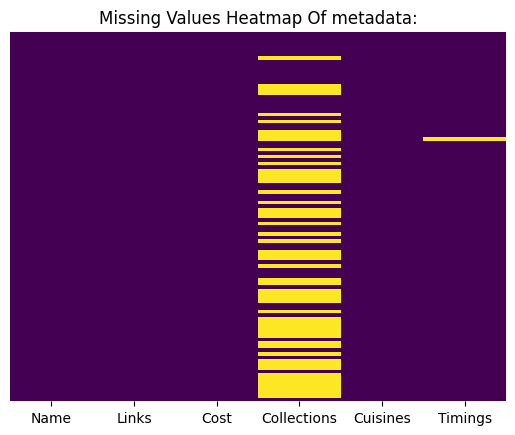

In [50]:
# Heatmap of missing values of metadata
sns.heatmap(metadata.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Values Heatmap Of metadata:")
plt.show()

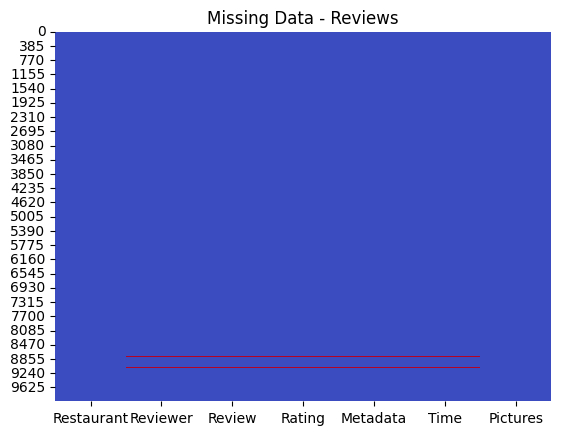

In [51]:
sns.heatmap(reviews.isnull(), cbar=False, cmap='coolwarm')
plt.title("Missing Data - Reviews")
plt.show()

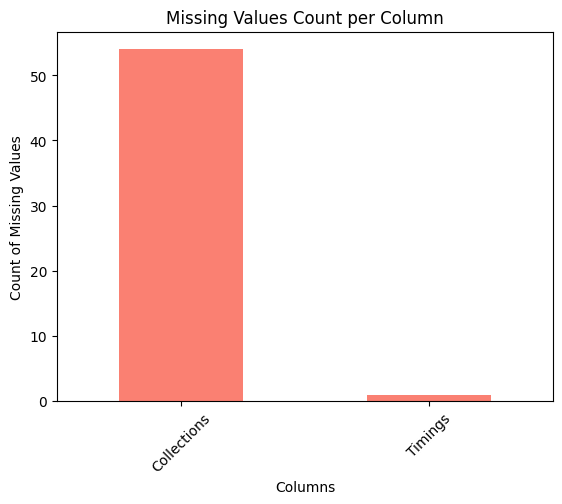

In [52]:
# Barplot of missing values count of metadata
missing_count = metadata.isnull().sum()
missing_count = missing_count[missing_count > 0]

missing_count.sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.title("Missing Values Count per Column")
plt.ylabel("Count of Missing Values")
plt.xlabel("Columns")
plt.xticks(rotation=45)
plt.show()


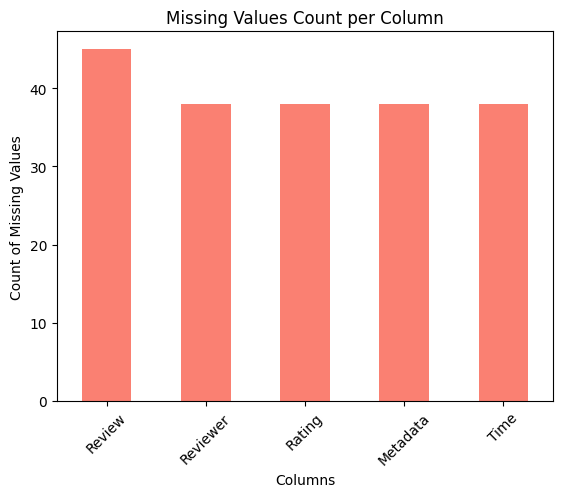

In [53]:
# Barplot of missing values count of reviews
missing_count = reviews.isnull().sum()
missing_count = missing_count[missing_count > 0]

missing_count.sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.title("Missing Values Count per Column")
plt.ylabel("Count of Missing Values")
plt.xlabel("Columns")
plt.xticks(rotation=45)
plt.show()


### What did you know about your dataset?

My dataset contains structured restaurant and review data with both categorical and numerical features. I’ve identified null values in some columns (e.g., cuisines, ratings), verified data types, and found a few duplicate entries. I understand the shape, column types, missingness, and summary stats — so I’m ready to begin preprocessing, cleaning, and clustering restaurants using machine learning techniques.

## ***2. Understanding Your Variables***

In [54]:
# Dataset Columns of metadata

In [55]:
metadata.columns.tolist()

['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']

In [56]:
print(metadata.dtypes)

Name           object
Links          object
Cost           object
Collections    object
Cuisines       object
Timings        object
dtype: object


In [57]:
# Dataset Columns of reviews

In [58]:
reviews.columns.tolist()

['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']

In [59]:
print(reviews.dtypes)

Restaurant    object
Reviewer      object
Review        object
Rating        object
Metadata      object
Time          object
Pictures       int64
dtype: object


### Variables Description

1. Zomato Restaurant

- Name : Name of Restaurants

- Links : URL Links of Restaurants

- Cost : Per person estimated Cost of dining

- Collection : Tagging of Restaurants w.r.t. Zomato categories

- Cuisines : Cuisines served by Restaurants

- Timings : Restaurant Timings

2. Zomato Restaurant Reviews

- Restaurant : Name of the Restaurant

- Reviewer : Name of the Reviewer

- Review : Review Text

- Rating : Rating Provided by Reviewer

- MetaData : Reviewer Metadata - No. of Reviews and followers

- Time: Date and Time of Review

- Pictures : No. of pictures posted with review

### Check Unique Values for each variable.

In [60]:
# Check Unique Values for each variable.

In [61]:
def check_unique_values(metadata, name="Dataset"):
    print(f"Unique Values in {name}")
    print("    ")
    for col in metadata.columns:
        unique_vals = metadata[col].unique()
        print(f"\nColumn: {col}")
        print(f"Unique Values Count: {metadata[col].nunique()}")
        print(f"Sample Values: {unique_vals[:5]}")
check_unique_values(metadata, "Metadata")

Unique Values in Metadata
    

Column: Name
Unique Values Count: 105
Sample Values: ['Beyond Flavours' 'Paradise' 'Flechazo' 'Shah Ghouse Hotel & Restaurant'
 'Over The Moon Brew Company']

Column: Links
Unique Values Count: 105
Sample Values: ['https://www.zomato.com/hyderabad/beyond-flavours-gachibowli'
 'https://www.zomato.com/hyderabad/paradise-gachibowli'
 'https://www.zomato.com/hyderabad/flechazo-gachibowli'
 'https://www.zomato.com/hyderabad/shah-ghouse-hotel-restaurant-gachibowli'
 'https://www.zomato.com/hyderabad/over-the-moon-brew-company-gachibowli']

Column: Cost
Unique Values Count: 29
Sample Values: ['800' '1,300' '1,200' '1,500' '500']

Column: Collections
Unique Values Count: 42
Sample Values: ['Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings'
 "Hyderabad's Hottest" "Great Buffets, Hyderabad's Hottest"
 'Late Night Restaurants'
 "Best Bars & Pubs, Food Hygiene Rated Restaurants in Hydera

In [62]:
def check_unique_values(reviews, name="Dataset"):
    print(f"Unique Values in {name}")
    print("    ")
    for col in reviews.columns:
        unique_vals = reviews[col].unique()
        print(f"\nColumn: {col}")
        print(f"Unique Values Count: {reviews[col].nunique()}")
        print(f"Sample Values: {unique_vals[:5]}")
check_unique_values(reviews, "Reviews")

Unique Values in Reviews
    

Column: Restaurant
Unique Values Count: 100
Sample Values: ['Beyond Flavours' 'Paradise' 'Flechazo' 'Shah Ghouse Hotel & Restaurant'
 'Over The Moon Brew Company']

Column: Reviewer
Unique Values Count: 7446
Sample Values: ['Rusha Chakraborty' 'Anusha Tirumalaneedi' 'Ashok Shekhawat'
 'Swapnil Sarkar' 'Dileep']

Column: Review
Unique Values Count: 9364
Sample Values: ['The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.'
 'Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service'
 'A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing.'
 'Soumen das and Arun was a gr

In [63]:
# Dataset Describe restaurant
metadata.describe().T

,count,unique,top,freq
Name,105,105,Beyond Flavours,1
Links,105,105,https://www.zomato.com/hyderabad/beyond-flavou...,1
Cost,105,29,500,13
Collections,51,42,Food Hygiene Rated Restaurants in Hyderabad,4
Cuisines,105,92,"North Indian, Chinese",4
Timings,104,77,11 AM to 11 PM,6


In [64]:
# dataset describe review
reviews.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Restaurant,10000,100,Beyond Flavours,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reviewer,9962,7446,Parijat Ray,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Review,9955,9364,good,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9962,10,5,3832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Metadata,9962,2477,1 Review,919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,9962,9782,7/29/2018 20:34,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pictures,10000.0,NaN,NaN,NaN,0.7486,2.570381,0.0,0.0,0.0,0.0,64.0


## 3. ***Data Wrangling***

### Data Wrangling Code

In [65]:
# Write your code to make your dataset analysis ready.

In [66]:
metadata_copy = metadata.copy()
metadata_copy.drop_duplicates(inplace=True)
print("Missing Values Before Cleaning:\n", metadata_copy.isnull().sum())
# Remove commas and convert Cost to float
metadata_copy['Cost'] = metadata_copy['Cost'].str.replace(",", "", regex=False).astype(float)
# Fill missing values
metadata_copy['Collections'] = metadata_copy['Collections'].fillna("Unknown")
metadata_copy['Timings'] = metadata_copy['Timings'].fillna("Unknown")

Missing Values Before Cleaning:
 Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64


In [67]:
for col in ['Name', 'Cuisines', 'Collections', 'Timings']:
    metadata_copy[col] = metadata_copy[col].astype(str).str.strip().str.title()

In [68]:
#before changing data type for cost checking values
metadata_copy['Cost'].unique()

array([ 800., 1300., 1200., 1500.,  500.,  300., 1000.,  350.,  400.,
       1600.,  750.,  550., 1900.,  450.,  150., 1400., 1100.,  600.,
        200.,  900.,  700., 1700., 2500.,  850.,  650., 1800., 2800.,
       1750.,  250.])

In [69]:
#top 5 costlier restaurant
metadata_copy.sort_values('Cost', ascending = False)[['Name','Cost']][:5]

,Name,Cost
92,Collage - Hyatt Hyderabad Gachibowli,2800.0
56,Feast - Sheraton Hyderabad Hotel,2500.0
21,Jonathan'S Kitchen - Holiday Inn Express & Suites,1900.0
18,10 Downing Street,1900.0
91,Cascade - Radisson Hyderabad Hitec City,1800.0


In [70]:
#top 5 economy restaurant
metadata_copy.sort_values('Cost', ascending = False)[['Name','Cost']][-5:]

,Name,Cost
85,Momos Delight,200.0
29,Hunger Maggi Point,200.0
101,Sweet Basket,200.0
89,Mohammedia Shawarma,150.0
23,Amul,150.0


In [71]:
print("Metadata Cleaned:")
display(metadata_copy.head())

Metadata Cleaned:


,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants In Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12Noon To 3:30Pm, 6:30Pm To 11:30Pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800.0,Hyderabad'S Hottest,"Biryani, North Indian, Chinese",11 Am To 11 Pm
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300.0,"Great Buffets, Hyderabad'S Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 Am To 4:30 Pm, 6:30 Pm To 11 Pm"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800.0,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon To 2 Am
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200.0,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12Noon To 11Pm (Mon, Tue, Wed, Thu, Sun), 12No..."


In [72]:

#hotels that share same price
metadata_copy_dict = {}
amount = metadata_copy.Cost.values.tolist()

#adding hotel name based on the price by converting it into list
for price in amount:
    # Get all the rows that have the current price
    rows = metadata_copy[metadata_copy['Cost'] == price]
    metadata_copy_dict[price] = rows["Name"].tolist()

#converting it into dataframe
same_price_metadata=pd.DataFrame.from_dict([metadata_copy_dict]).transpose().reset_index().rename(
    columns={'index':'Cost',0:'Name of Restaurants'})

#alternate methode to do the same
#same_price_hotel_df = hotel.groupby('Cost')['Name'].apply(lambda x: x.tolist()).reset_index()

#getting hotel count
metadata_copy_count = metadata_copy.groupby('Cost')['Name'].count().reset_index().sort_values(
    'Cost', ascending = False)

#merging together
same_price_metadata = same_price_metadata.merge(metadata_copy_count, how = 'inner',
                        on = 'Cost').rename(columns = {'Name':'Total_Restaurant'})

#max hotels that share same price
same_price_metadata.sort_values('Total_Restaurant', ascending = False)[:5]

,Cost,Name of Restaurants,Total_Restaurant
4,500.0,"[Eat.Fit, Kfc, Kritunga Restaurant, Karachi Ba...",13
17,600.0,"[Behrouz Biryani, Karachi Cafe, Hyderabad Chef...",10
20,700.0,"[Marsala Food Company, Green Bawarchi Restaura...",8
2,1200.0,"[Over The Moon Brew Company, The Glass Onion, ...",7
8,400.0,"[Sardarji'S Chaats & More, Hotel Zara Hi-Fi, P...",6


In [73]:
#hotels which has max price
same_price_metadata.sort_values('Cost', ascending = False)[:5]

,Cost,Name of Restaurants,Total_Restaurant
26,2800.0,[Collage - Hyatt Hyderabad Gachibowli],1
22,2500.0,[Feast - Sheraton Hyderabad Hotel],1
12,1900.0,"[10 Downing Street, Jonathan'S Kitchen - Holid...",2
25,1800.0,[Cascade - Radisson Hyderabad Hitec City],1
27,1750.0,[Zega - Sheraton Hyderabad Hotel],1


In [74]:
reviews_copy = reviews.copy()
# Drop missing Reviews or Ratings
reviews_copy = reviews_copy[reviews_copy['Review'].notnull() & reviews_copy['Rating'].notnull()]
# Remove non-numeric ratings
reviews_copy = reviews_copy[~reviews_copy['Rating'].isin(['Like'])]
# Convert Rating to float
reviews_copy['Rating'] = reviews_copy['Rating'].astype(float)

In [75]:
# spliting the cusines and storing in list
cuisine_value_list = metadata_copy.Cuisines.str.split(', ')

In [76]:
# storing all the cusines in a dict
cuisine_dict = {}
for cuisine_names in cuisine_value_list:
    for cuisine in cuisine_names:
        if (cuisine in cuisine_dict):
            cuisine_dict[cuisine]+=1
        else:
            cuisine_dict[cuisine]=1

In [77]:
# converting the dict to a data frame
cuisine_df=pd.DataFrame.from_dict([cuisine_dict]).transpose().reset_index().rename(
    columns={'index':'Cuisine',0:'Number of Restaurants'})

In [78]:
#top 5 cuisine
cuisine_df.sort_values('Number of Restaurants', ascending =False)[:5]

,Cuisine,Number of Restaurants
5,North Indian,61
0,Chinese,43
1,Continental,21
6,Biryani,16
18,Fast Food,15


In [79]:
# spliting the cusines and storing in list
Collections_value_list = metadata_copy.Collections.dropna().str.split(', ')

In [80]:
# storing all the cusines in a dict
Collections_dict = {}
for collection in Collections_value_list:
    for col_name in collection:
        if (col_name in Collections_dict):
            Collections_dict[col_name]+=1
        else:
            Collections_dict[col_name]=1

In [81]:
# converting the dict to a data frame
Collections_df=pd.DataFrame.from_dict([Collections_dict]).transpose().reset_index().rename(
    columns={'index':'Tags',0:'Number of Restaurants'})


In [82]:
#top 5 collection
Collections_df.sort_values('Number of Restaurants', ascending =False)[:5]

,Tags,Number of Restaurants
10,Unknown,54
2,Great Buffets,11
0,Food Hygiene Rated Restaurants In Hyderabad,8
5,Live Sports Screenings,7
6,Hyderabad'S Hottest,7


Reviews

In [83]:
reviews_copy['Sentiment'] = reviews_copy['Review'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
# Add Review Length (word count)
reviews_copy['Review_Length'] = reviews_copy['Review'].apply(lambda x: len(str(x).split()))
# --- Aggregation: Restaurant-level Review Insights ---
agg_reviews = reviews_copy.groupby('Restaurant').agg({
    'Rating': 'mean',              # Average Rating
    'Review': 'count',             # Total Review Count
    'Sentiment': 'mean',           # Average Sentiment
    'Review_Length': 'mean',       # Average Review Length
    'Pictures': 'mean'             # Average Pictures per review
}).reset_index().rename(columns={
    'Rating': 'Avg_Rating',
    'Review': 'Review_Count',
    'Sentiment': 'Avg_Sentiment',
    'Review_Length': 'Avg_Review_Length',
    'Pictures': 'Avg_Pictures'
})
print("Reviews Cleaned:")
display(reviews_copy.head())

Reviews Cleaned:


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Sentiment,Review_Length
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0,0.660000,41
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,0.606667,27
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,0.540000,31
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0,0.500000,28
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,0.577500,27


In [84]:

#in order to change data type for rating checking values
reviews_copy.Rating.value_counts()

,count
Rating,
5.0,3826
4.0,2373
1.0,1735
3.0,1192
2.0,684
4.5,69
3.5,47
2.5,19
1.5,9


In [85]:
# Converting rating values from strings to integers
# Replacing 'Like' (a non-numeric rating) with 0 to handle it as a placeholder
# Since no restaurant has a rating of 0, we'll later replace 0 with the median rating
reviews_copy.loc[reviews_copy['Rating'] == 'Like'] = 0
#changing data type for rating in review data
reviews_copy['Rating'] = reviews_copy['Rating'].astype('float')

In [86]:
#since there is one rating as like converting it to median
reviews_copy.loc[reviews_copy['Rating'] == 0] = reviews_copy.Rating.median()

In [87]:
# Extracting reviewer metadata: total reviews and followers
reviews_copy[['Reviewer_Total_Review', 'Reviewer_Followers']] = reviews_copy['Metadata'].str.split(',', expand=True)

# Converting extracted values to numeric
reviews_copy['Reviewer_Total_Review'] = pd.to_numeric(reviews_copy['Reviewer_Total_Review'].str.split(' ').str[0], errors='coerce')
reviews_copy['Reviewer_Followers'] = pd.to_numeric(reviews_copy['Reviewer_Followers'].str.split(' ').str[1], errors='coerce')

# Converting review time to datetime and extracting features
reviews_copy['Time'] = pd.to_datetime(reviews_copy['Time'], errors='coerce')
reviews_copy['Review_Year'] = reviews_copy['Time'].dt.year
reviews_copy['Review_Month'] = reviews_copy['Time'].dt.month
reviews_copy['Review_Hour'] = reviews_copy['Time'].dt.hour

In [88]:
#Average engagement of restaurants
avg_metadata_rating = reviews_copy.groupby('Restaurant').agg({'Rating':'mean',
        'Reviewer': 'count'}).reset_index().rename(columns = {'Reviewer': 'Total_Review'})
avg_metadata_rating

,Restaurant,Rating,Total_Review
0,10 Downing Street,3.80,100
1,13 Dhaba,3.48,100
2,"3B's - Buddies, Bar & Barbecue",4.76,100
3,AB's - Absolute Barbecues,4.88,100
4,Absolute Sizzlers,3.62,100
...,...,...,...
95,Urban Asia - Kitchen & Bar,3.65,100
96,Yum Yum Tree - The Arabian Food Court,3.56,100
97,Zega - Sheraton Hyderabad Hotel,4.45,100
98,Zing's Northeast Kitchen,3.65,100


In [89]:
#usless data
reviews_copy[reviews_copy['Restaurant'] == 4.0]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Sentiment,Review_Length,Reviewer_Total_Review,Reviewer_Followers,Review_Year,Review_Month,Review_Hour


In [90]:
#checking hotel count as total hotel in restaurant data was 105
reviews_copy.Restaurant.nunique()

100

In [91]:
#hotel without review
hotel_without_review = [name for name in metadata_copy.Name.unique().tolist()
       if name not in reviews_copy.Restaurant.unique().tolist()]
hotel_without_review

["The Fisherman'S Wharf",
 'Eat.Fit',
 "Sardarji'S Chaats & More",
 "Ab'S - Absolute Barbecues",
 'Kfc',
 'Norfest - The Dhaba',
 "Jonathan'S Kitchen - Holiday Inn Express & Suites",
 'Skyhy',
 "3B'S - Buddies, Bar & Barbecue",
 "Udipi'S Upahar",
 'Ks Bakers',
 'Pourhouse7',
 'Aromas@11Six',
 "Gd'S",
 "Domino'S Pizza",
 "Zing'S Northeast Kitchen",
 'Indiblaze',
 'Sweet Basket',
 'Angaara Counts 3',
 'Wich Please',
 'Republic Of Noodles - Lemon Tree Hotel']

In [92]:
#top 5 most engaging or rated restaurant
avg_metadata_rating.sort_values('Rating', ascending = False)[:5]

,Restaurant,Rating,Total_Review
3,AB's - Absolute Barbecues,4.88,100
11,B-Dubs,4.81,100
2,"3B's - Buddies, Bar & Barbecue",4.76,100
67,Paradise,4.70,100
35,Flechazo,4.66,100


In [93]:
#top 5 lowest rated restaurant
avg_metadata_rating.sort_values('Rating', ascending = True)[:5]

,Restaurant,Rating,Total_Review
41,Hotel Zara Hi-Fi,2.400,100
10,Asian Meal Box,2.580,100
66,Pakwaan Grand,2.710,100
57,Mathura Vilas,2.820,100
14,Behrouz Biryani,2.825,100


In [94]:
#finding which year show maximum engagement
hotel_year = reviews_copy.groupby('Review_Year')['Restaurant'].apply(lambda x: x.tolist()).reset_index()
hotel_year['Count']= hotel_year['Restaurant'].apply(lambda x: len(x))
hotel_year

,Review_Year,Restaurant,Count
0,2016,"[Labonel, Labonel, Labonel, Labonel, Labonel, ...",43
1,2017,"[KS Bakers, KS Bakers, KS Bakers, KS Bakers, K...",213
2,2018,"[Shah Ghouse Spl Shawarma, Shah Ghouse Spl Sha...",4896
3,2019,"[Beyond Flavours, Beyond Flavours, Beyond Flav...",4802


In [95]:
#the most followed reviewers
most_followed_reviewer = reviews_copy.groupby('Reviewer').agg({'Reviewer_Total_Review':'max',
      'Reviewer_Followers':'max', 'Rating':'mean'}).reset_index().rename(columns = {
          'Rating':'Average_Rating_Given'}).sort_values('Reviewer_Followers', ascending = False)
most_followed_reviewer[:5]

,Reviewer,Reviewer_Total_Review,Reviewer_Followers,Average_Rating_Given
5460,Satwinder Singh,186,13410.0,3.666667
1700,Eat_vth_me,60,13320.0,5.000000
5232,Samar Sardar,8,11329.0,3.500000
1786,Foodies Hyderabad,31,9494.0,4.500000
6225,Srinivas,34,7628.0,3.714286


In [96]:
print("Aggregated Review Data:")
display(agg_reviews.head())

Aggregated Review Data:


,Restaurant,Avg_Rating,Review_Count,Avg_Sentiment,Avg_Review_Length,Avg_Pictures
0,10 Downing Street,3.80,100,0.299416,69.77,1.05
1,13 Dhaba,3.48,100,0.227825,38.45,0.41
2,"3B's - Buddies, Bar & Barbecue",4.76,100,0.516464,33.61,0.13
3,AB's - Absolute Barbecues,4.88,100,0.585566,35.74,0.24
4,Absolute Sizzlers,3.62,100,0.263170,43.64,0.45


In [97]:
#merge both data frame
hotel = metadata_copy.rename(columns = {'Name':'Restaurant'})
merged = hotel.merge(reviews_copy, on = 'Restaurant')
merged.shape

(8355, 19)

In [98]:
#Price point of restaurants
price_point = merged.groupby('Restaurant').agg({'Rating':'mean',
        'Cost': 'mean'}).reset_index().rename(columns = {'Cost': 'Price_Point'})
#price for high rated restaurants
price_point.sort_values('Rating',ascending = False)[:5]

,Restaurant,Rating,Price_Point
8,B-Dubs,4.81,1600.0
58,Paradise,4.70,800.0
31,Flechazo,4.66,1300.0
74,The Indi Grill,4.60,1500.0
83,Zega - Sheraton Hyderabad Hotel,4.45,1750.0


In [99]:
# price for lowest
price_point.sort_values('Rating',ascending = True)[:5]

,Restaurant,Rating,Price_Point
36,Hotel Zara Hi-Fi,2.400,400.0
7,Asian Meal Box,2.580,200.0
57,Pakwaan Grand,2.710,400.0
49,Mathura Vilas,2.820,500.0
11,Behrouz Biryani,2.825,600.0


In [100]:
#rating count by reviewer
rating_count_df = pd.DataFrame(reviews_copy.groupby('Reviewer').size(), columns=[
                                                                "Rating_Count"])
rating_count_df.sort_values('Rating_Count', ascending = False)[:5]

,Rating_Count
Reviewer,
Ankita,13
Parijat Ray,13
Kiran,12
Vedant Killa,11
Jay Mehta,11


## What all manipulations have you done and insights you found?

I began the project by standardizing data types for key columns. For the Cost and Rating columns, I ensured they were properly converted to numerical types. The Rating column had a single non-numeric value ("Like"), which I replaced with the median rating to maintain data consistency.

### Restaurant Dataset Insights:
 - Identified the top 5 most expensive restaurants, with Collage - Hyatt Hyderabad Gachibowli being the costliest at ₹2800.

 - The least expensive restaurant was Amul, priced at ₹150.

 - Found that 13 restaurants shared a common price point of ₹500.

 - North Indian cuisine with "Great Buffet" tags appeared most frequently among popular listings.

### Review Dataset Insights:
 - Analyzed user engagement to determine the most popular restaurants based on review activity.

 - Identified Satwinder Singh as the most followed reviewer, with 13410 followers and 186 reviews, averaging a rating of 3.67.

 - Observed that 4,903 reviews were submitted in the year 2018 alone.

### Merged Analysis:
 - Combined both datasets to explore deeper insights.

 - Found that AB’s - Absolute Barbecues, one of the top-rated restaurants, had a price point of ₹1500.

 - In contrast, Hotel Zara Hi-Fi, a low-rated restaurant, had a price point of ₹400.

To better understand why highly rated restaurants like AB’s succeed despite high pricing, I planned to perform sentiment analysis on review texts by extracting key words and phrases. This would be followed by clustering similar restaurants to generate personalized recommendations and uncover patterns in quality vs. pricing.

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1  Maximum Engagement and Lowest Engagement (Visualization for most liked and less like)

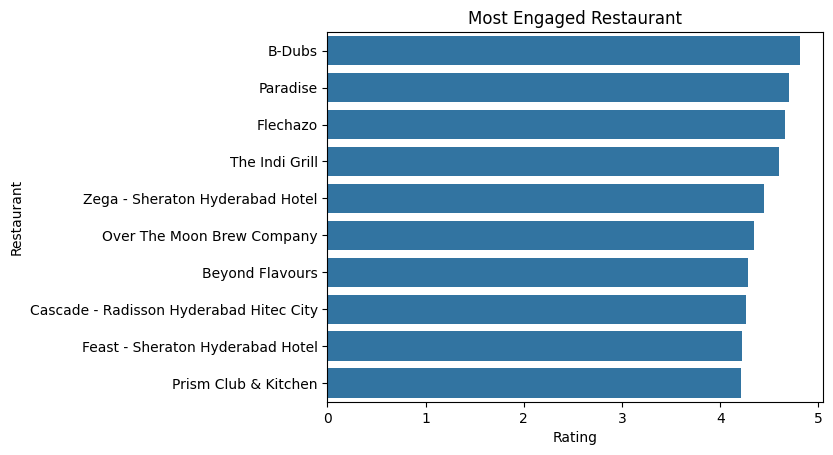

In [101]:
#geting the top 10 hotel that show maximum engagement
most_engaged_hotel = price_point.sort_values('Rating', ascending = False)
sns.barplot(data = most_engaged_hotel[:10], x = 'Rating', y = 'Restaurant')
plt.title('Most Engaged Restaurant')
plt.show()

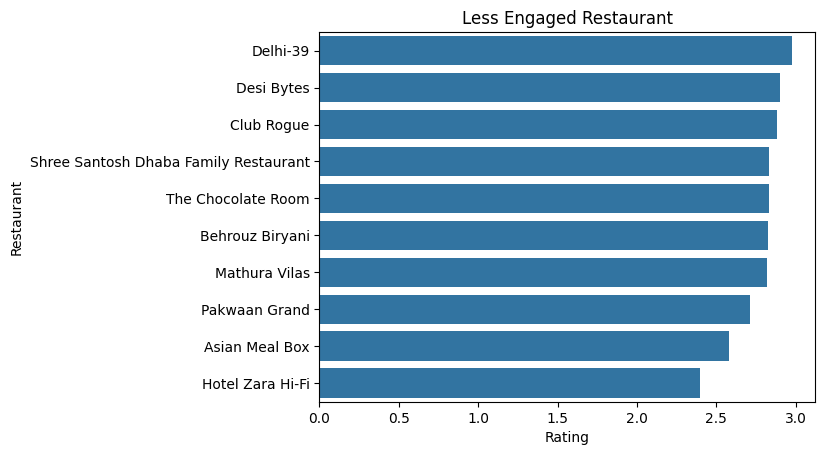

In [102]:
sns.barplot(data = most_engaged_hotel[-10:], x = 'Rating', y = 'Restaurant')
plt.title('Less Engaged Restaurant')
plt.show()

##### 1. Why did you pick the specific chart?

I selected a bar plot for this analysis because it effectively displays the frequency or distribution of categorical data. In this case, it visually represents the average rating across different restaurants, making it easier to identify those with high or low engagement at a glance.

##### 2. What is/are the insight(s) found from the chart?

From the chart, we observed that AB's - Absolute Barbecues has the highest customer engagement and retention, indicated by the highest average number of ratings. In contrast, Hotel Zara Hi-Fi shows the lowest engagement, as reflected by its low average rating, highlighting areas of potential improvement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can significantly impact business growth. High engagement and retention—such as seen with AB's—suggest strong brand loyalty and customer satisfaction, which are crucial for long-term profitability and scalability.

On the other hand, low ratings for certain restaurants may indicate negative customer experiences. For example, even popular chains like KFC appearing in the low-rated list could signal issues at specific outlets. This might be due to poor service, quality inconsistency, or lack of proper management on aggregator platforms like Zomato. If such concerns are not addressed, they can lead to negative brand perception and revenue loss, especially when customers begin associating the brand with poor performance.

Hence, monitoring ratings and reviews closely and responding with timely improvements is vital for sustained business success on online platforms.

#### Chart - 2   pie chart for top 5 mpst selling cuisine...Proportion of Cuisine Sold by Most Restaurant

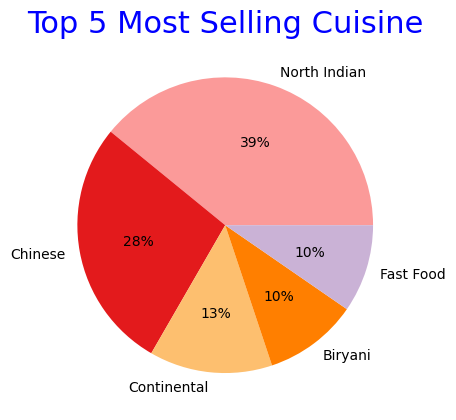

In [103]:
#list of all cuisine
cuisine_list = cuisine_df.sort_values('Number of Restaurants', ascending = False)['Cuisine'].tolist()[:5]
data = cuisine_df.sort_values('Number of Restaurants', ascending = False)[
    'Number of Restaurants'].tolist()[:5]
labels = cuisine_list

#define Seaborn color palette to use
colors = sns.color_palette('Paired')[4:9]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Top 5 Most Selling Cuisine', size =22, color= 'blue')
plt.show()

##### 1. Why did you pick the specific chart?

I chose to use a pie chart to represent the proportion of cuisine types sold, as it clearly shows the relative distribution of each category. Additionally, I used a word cloud to visualize review text data, as it highlights the most frequently mentioned words, helping to identify common themes or sentiments expressed by customers.

##### 2. What is/are the insight(s) found from the chart?

From the pie chart, it is evident that North Indian cuisine is the most commonly sold across restaurants, followed by Chinese cuisine. This indicates a strong customer preference for these food types.
The word cloud further reinforces this insight, showcasing frequent mentions of "North Indian," "Chinese," and related keywords, suggesting that these cuisines are not only widely available but also actively discussed and reviewed by customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, identifying commoditized cuisines (like North Indian) can reveal risks of overcrowding and high competition. When too many restaurants offer the same cuisine, it leads to price drops, lower profit margins, and less differentiation.

This can hurt growth if customer expectations aren't met or if the platform lacks variety. While pie charts and word clouds show popularity, they also highlight the risk of market saturation and the need for diverse offerings to avoid negative business impact.

#### Chart - 3   pie chart for top 5 mpst selling cuisine ( Most used Tags )

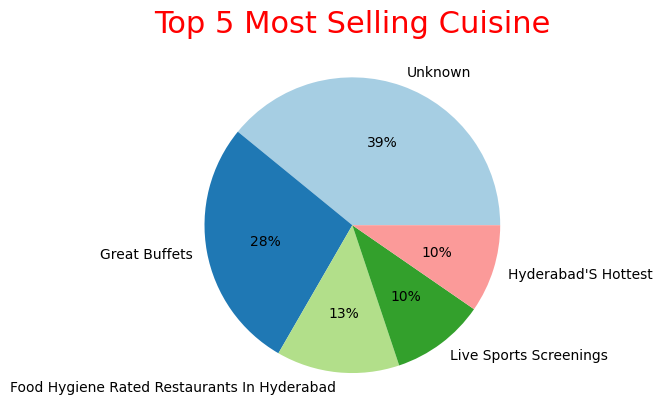

In [104]:
#list of all collection
collection_list = Collections_df.sort_values('Number of Restaurants',
                          ascending = False)['Tags'].tolist()[:5]
data = cuisine_df.sort_values('Number of Restaurants', ascending = False)[
    'Number of Restaurants'].tolist()[:5]
labels = collection_list

#define Seaborn color palette to use
colors = sns.color_palette('Paired')[:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Top 5 Most Selling Cuisine', size =22, color= 'red')
plt.show()

##### 1. Why did you pick the specific chart?

The pie chart shows the proportion of different food attributes, making it easy to compare popularity. The word cloud highlights frequently used tags in reviews, helping spot patterns quickly. Together, they offer a clear view of customer preferences and trends.

##### 2. What is/are the insight(s) found from the chart?

"Great Buffets" is the most commonly used tag, followed by frequent mentions of terms like "great", "best", "north", and "Hyderabad", indicating customer preferences and popular offerings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, insights can help Zomato promote restaurants known for highly rated tags like "delicious" or "fresh", improving user satisfaction and engagement.
However, over-reliance on common tags or cuisines may lead to market saturation and lack of variety, which can hurt long-term growth if customer expectations aren't diversified.

#### Chart - 4    Learn about Reviewers

/tmp/ipython-input-105-4075717961.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = most_followed_reviewer[:10], x = 'Reviewer_Total_Review',


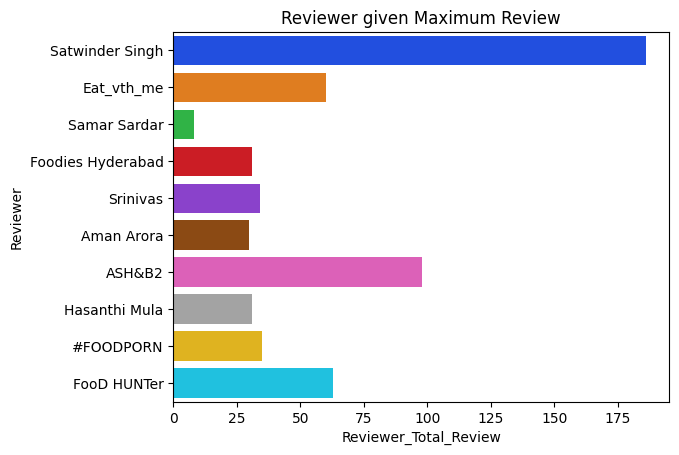

In [105]:
# code for most review
sns.barplot(data = most_followed_reviewer[:10], x = 'Reviewer_Total_Review',
            y = 'Reviewer', palette='bright')
plt.title('Reviewer given Maximum Review')
plt.show()

/tmp/ipython-input-106-1058815303.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = most_followed_reviewer[:10], x = 'Average_Rating_Given',


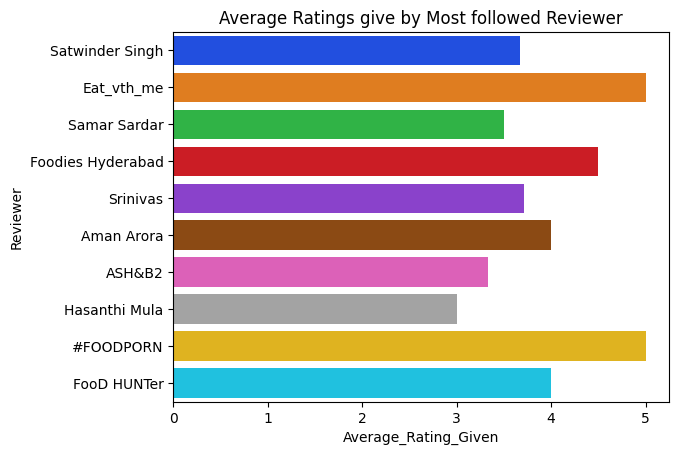

In [106]:
# code for average rating given by most followed reviewer
sns.barplot(data = most_followed_reviewer[:10], x = 'Average_Rating_Given',
            y = 'Reviewer',palette='bright')
plt.title('Average Ratings give by Most followed Reviewer')
plt.show()

/tmp/ipython-input-107-175533562.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = most_followed_reviewer[:10], x = 'Reviewer_Followers',


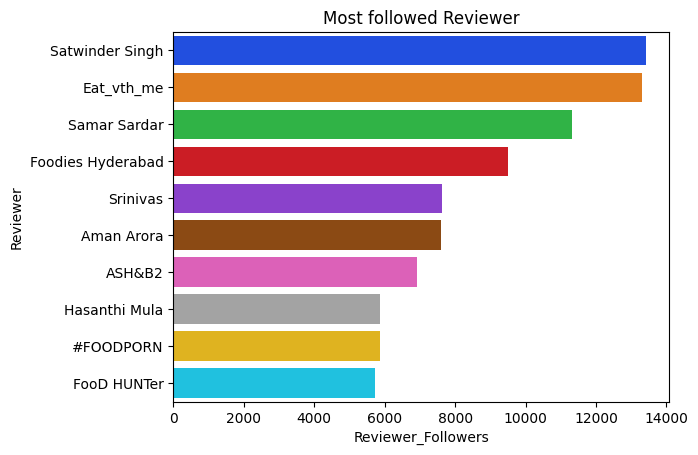

In [107]:
# code for most review follower
sns.barplot(data = most_followed_reviewer[:10], x = 'Reviewer_Followers',
            y = 'Reviewer',palette='bright')
plt.title('Most followed Reviewer')
plt.show()

##### 1. Why did you pick the specific chart?

Barplot helps in understanding the frequency of rating, follower and total reviews with respect to reviewer. Plotting total review, average reviewer rating, and total follower allows to see the correlation between these variables and how they relate to one another for each reviewer. It can also give insight on how reviewers with more followers tend to get more reviews, how their ratings tend to be, etc.

##### 2. What is/are the insight(s) found from the chart?

Satwinder singh is the most popular critic who has maximum number of follower and on an average he give 3.5 rating.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

This information can be used to make strategic decisions about which reviewers to focus on promoting and expanding. For example, if a certain reviewer has a high average rating and a large number of followers, Zomato could focus on promoting their reviews to customers.

It's important to note that this chart does not provide all the information about the business, and can not be the only decision making factor. However it can help on promotions food based on reviews.

#### Chart - 5  Distplot for Distribution

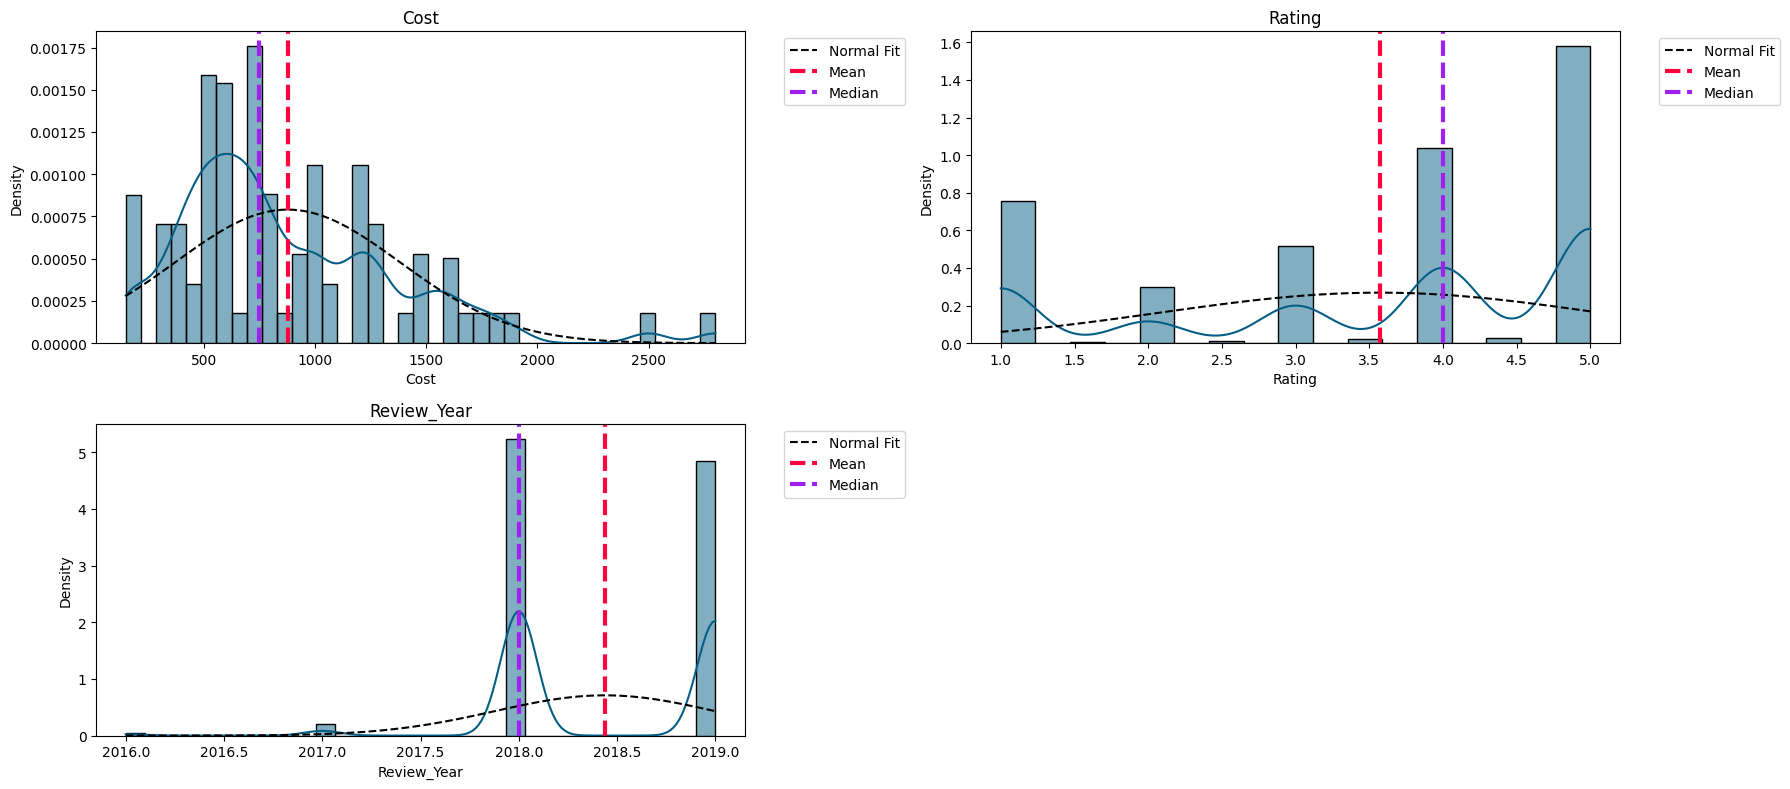

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

plt.figure(figsize=(18, 8))

for i, col in enumerate(['Cost', 'Rating', 'Review_Year']):
    plt.subplot(2, 2, i + 1)

    # Plot histogram with KDE
    sns.histplot(merged[col], kde=True, stat="density", color='#055E85')

    feature = merged[col]

    # Add normal distribution curve
    x_vals = np.linspace(feature.min(), feature.max(), 100)
    y_vals = norm.pdf(x_vals, feature.mean(), feature.std())
    plt.plot(x_vals, y_vals, color='black', linestyle='--', label='Normal Fit')

    # Mean and median lines
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3, label='Mean')
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3, label='Median')

    # Title and legend
    plt.title(f'{col.title()}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # valid location
    plt.tight_layout()


##### 1. Why did you pick the specific chart?

Distplot is helpful in understanding the distribution of the feature.

##### 2. What is/are the insight(s) found from the chart?

All three are show skewness.
Maximum restaurant show price range for 500.
In 2018 number of reviews are more.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

Price always place important role in any business alongwith rating which show how much engagement are made for the product.

But in this chart it is unable to figure any impact on business when plotted all alone.

#### Chart - 6   Price Point for High Rated and Low Rated Hotels

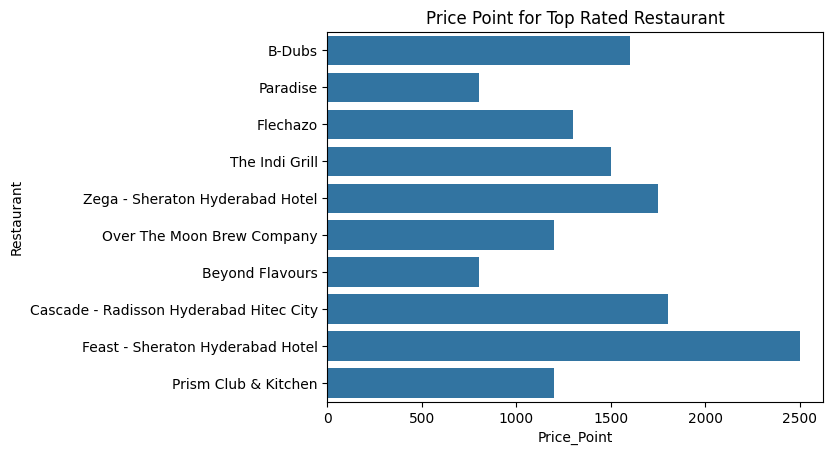

In [109]:
sns.barplot(data = most_engaged_hotel[:10], x = 'Price_Point', y = 'Restaurant')
plt.title('Price Point for Top Rated Restaurant')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar plot because it's effective for comparing hotel names against their price points. It clearly shows differences in pricing across restaurants, making it easy to understand the pricing strategy and relative positioning.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that AB's - Absolute Barbecues, a highly-rated restaurant, has a price point of ₹1500, while Hotel Zara Hi-Fi, a low-rated one, is priced at ₹400.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding price points helps businesses balance affordability and quality. High-rated restaurants can justify premium pricing if quality and taste drive customer satisfaction.

However, some low-rated restaurants with lower prices still show poor engagement, suggesting that pricing alone doesn’t ensure success. This can signal negative growth if not addressed. Still, such restaurants shouldn't be judged only by ratings, as factors like cuisine type and target audience may differ. A deeper review analysis can reveal more accurate reasons behind customer response.

#### Chart - 7    Correlation Heatmap

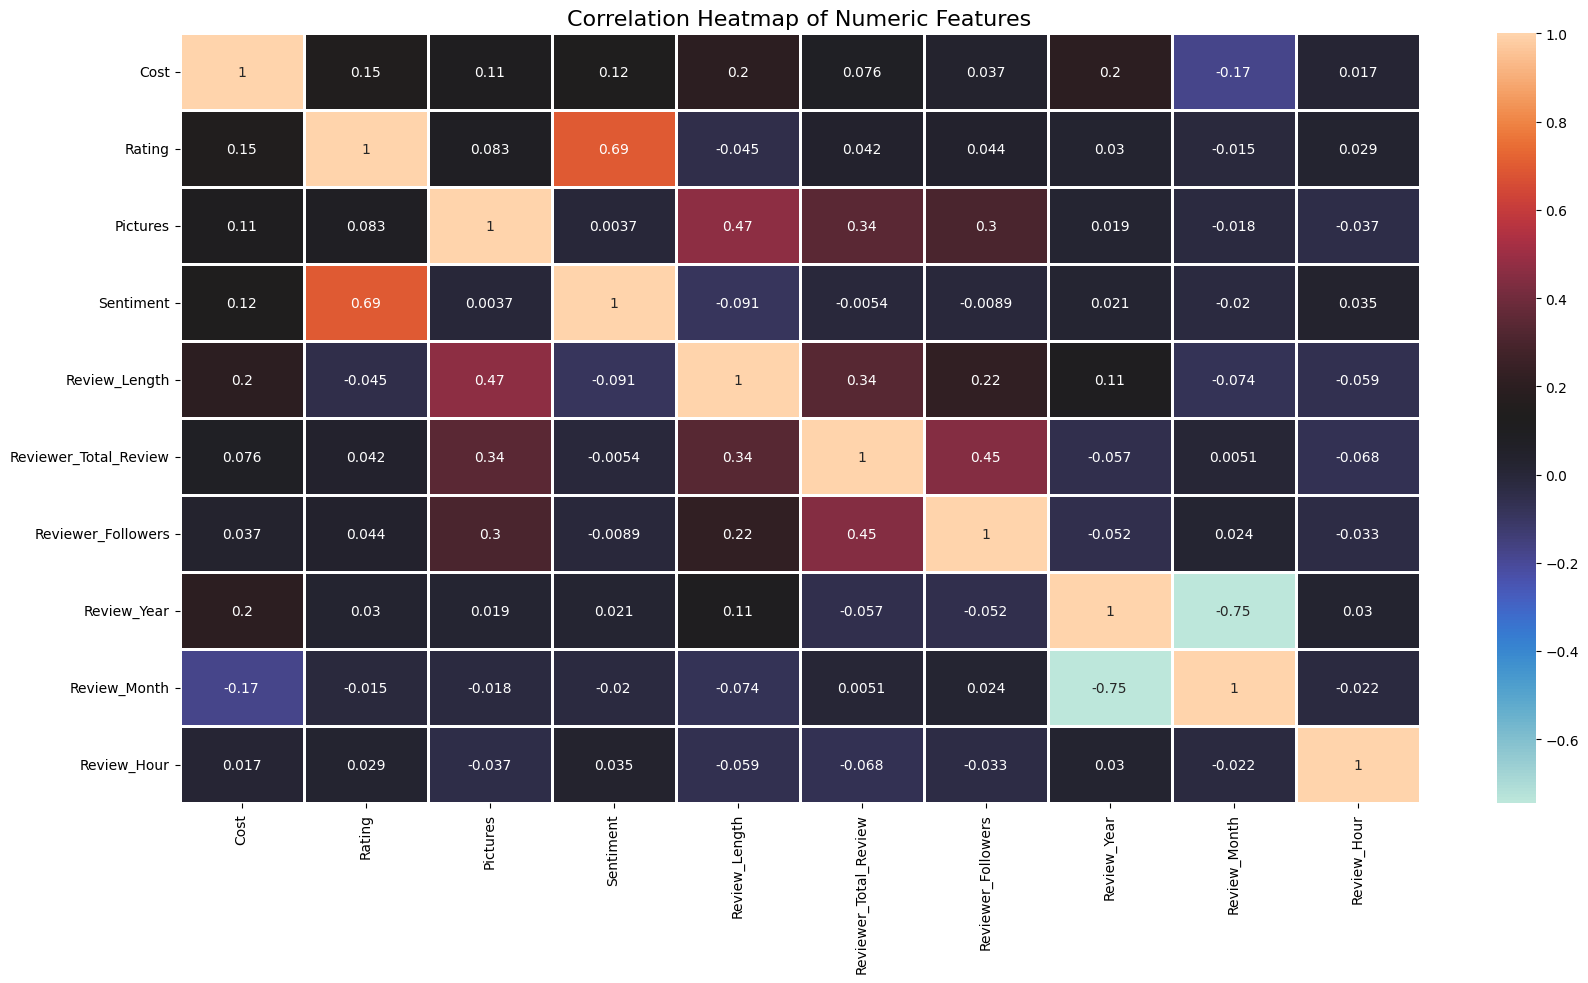

In [110]:
# Correlation Heatmap visualization code
# checking heatmap/correlation matrix to see the how the colums are correlated with each other
# Select only numeric columns
numeric_data = merged.select_dtypes(include=['number'])

# Plot the correlation heatmap
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(numeric_data.corr(), ax=ax, annot=True, cmap='icefire', linewidths=1)

plt.title('Correlation Heatmap of Numeric Features', fontsize=16)
plt.show()


##### 1. Why did you pick the specific chart?

I chose a correlation heatmap because it visually represents the relationship between numerical variables in a clear and intuitive way. Each cell shows a correlation coefficient between -1 and 1, helping to quickly identify which variables are positively or negatively related. It's useful for both data summarization and identifying potential predictors for further analysis.

##### 2. What is/are the insight(s) found from the chart?

From the heatmap, we observed that:

- Reviewer Total Reviews is strongly correlated with Reviewer Followers and also with the number of pictures.

- Most other features show weak or no significant correlation, indicating independence between them.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can drive positive impact. For example, knowing that users with more reviews tend to have more followers and upload more pictures suggests that engaged reviewers influence visibility and credibility. Platforms like Zomato can promote or reward such users to enhance engagement.

However, over-reliance on a few correlated variables may bias recommendations or insights. If the system prioritizes only highly active reviewers, it may ignore valuable but less frequent users, potentially leading to skewed feedback and loss of diverse customer input, which could impact trust and growth in the long run.

#### Chart - 8

In [111]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [112]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [113]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [114]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [115]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [116]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [117]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. The cost of a restaurant is positively correlated with the rating it receives.
2. Restaurants that are reviewed by reviewers with more followers will have a higher rating.
3. Restaurants that offer a wider variety of cuisines will have a higher rating.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): There is no positive correlation between restaurant cost and rating. (H0: 𝛽1 = 0)

Alternative Hypothesis (H₁): There is a positive correlation between restaurant cost and rating.(H1: 𝛽1 > 0)

#### 2. Code

In [119]:
from scipy.stats import pearsonr

# Drop NA just in case
df = merged[['Cost', 'Rating']].dropna()

# Pearson correlation
corr, p_value = pearsonr(df['Cost'], df['Rating'])
print(f"Correlation: {corr}, p-value: {p_value}")

Correlation: 0.14705090804111823, p-value: 1.3143428618928812e-41


### Conclusion

If p-value < 0.05 and correlation > 0, reject the null hypothesis.
If true, we conclude higher-cost restaurants tend to receive better ratings.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: The number of followers a reviewer has has no effect on the rating of a restaurant. (H0: 𝛽1 = 0)

Alternative hypothesis: Alternative Hypothesis: The number of followers a reviewer has has a positive effect on the rating of a restaurant. (H1: 𝛽1 > 0)

#### 2. code

In [120]:
## Perform Statistical Test to obtain P-Value
import statsmodels.formula.api as smf


# fit the linear model
model = smf.ols(formula='Rating ~ Reviewer_Followers', data = merged).fit()

# print the summary of the model
# print(model.summary())

# extract p-value of coefficient for Reviewer_Followers
p_value = model.pvalues[1]

if p_value < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")


Reject Null Hypothesis


/tmp/ipython-input-120-2676027876.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model.pvalues[1]


### 3. conclusion

If p < 0.05 and corr > 0, reject H₀.
If so, this suggests that influential reviewers may associate with higher-rated restaurants.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: The variety of cuisines offered by a restaurant has no effect on its rating. (H0: 𝛽3 = 0)

Alternative hypothesis: The variety of cuisines offered by a restaurant has a positive effect on its rating. (H1: 𝛽3 > 0)

Test : Chi-Squared Test


#### 2. Perform an appropriate statistical test.

In [121]:
pd.crosstab(merged['Cuisines'], merged['Rating'])[:1]

Rating,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
Cuisines,,,,,,,,,
American,1,0,1,0,2,0,8,0,88


In [122]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# create a contingency table
ct = pd.crosstab(merged['Cuisines'], merged['Rating'])

# perform chi-squared test
chi2, p, dof, expected = chi2_contingency(ct)

# Check p-value
if p < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [123]:
# Handling Missing Values & Missing Value Imputation

#deleting duplicate value from review dataset
reviews_copy = reviews_copy.drop_duplicates()

In [124]:
#final check after dropping duplicates
print(f"Anymore duplicate left ? {reviews_copy.duplicated().value_counts()}, unique values with {len(reviews_copy[reviews_copy.duplicated()])} duplication")


Anymore duplicate left ? False    9954
Name: count, dtype: int64, unique values with 0 duplication


In [125]:
# Handling Missing Values & Missing Value Imputation
hotel.isnull().sum()

,0
Restaurant,0
Links,0
Cost,0
Collections,0
Cuisines,0
Timings,0


In [126]:
# Handling Missing Values & Missing Value Imputation
metadata_copy.isnull().sum()

,0
Name,0
Links,0
Cost,0
Collections,0
Cuisines,0
Timings,0


In [127]:
#review missing value
reviews_copy.isnull().sum()

,0
Restaurant,0
Reviewer,0
Review,0
Rating,0
Metadata,0
Time,0
Pictures,0
Sentiment,0
Review_Length,0
Reviewer_Total_Review,0


In [128]:
# dropping null values in reviewer and Reviewer_Total_Review column as all values are null for those column
review = reviews_copy.dropna(subset=['Reviewer','Reviewer_Total_Review'])

In [129]:
#again checking the remaining values
null_counts = [(x, a) for x, a in reviews_copy.isnull().sum().items() if a > 0]

# Print the columns with null values
null_counts

[('Reviewer_Followers', 1574)]

In [130]:
#filling null values in review and reviewer follower column
reviews_copy = reviews_copy.fillna({"Review": "No Review", "Reviewer_Followers": 0})

In [131]:
# final checking null values
reviews_copy.isnull().sum()

,0
Restaurant,0
Reviewer,0
Review,0
Rating,0
Metadata,0
Time,0
Pictures,0
Sentiment,0
Review_Length,0
Reviewer_Total_Review,0


In [132]:
#merging both dataset
merged = hotel.merge(review, on = 'Restaurant')
merged.shape

(8355, 19)

### What all missing value imputation techniques have you used and why did you use those techniques?

To handle missing values, I first removed 36 duplicate rows that contained only restaurant names with all other fields as null. In the hotel dataset, the Timings column had only one missing value, which I filled with the mode since it’s a categorical field and mode is robust. The Collections column had over 50% missing data, so I dropped it entirely to maintain data quality. In the review dataset, columns like Reviewer and Reviewer_Total_Review had all null values, so I removed them. For the remaining missing values, I replaced null Review entries with "no review" (as it's textual) and set missing Reviewer_Followers to 0, assuming the user had no followers. This approach ensured clean and consistent data for further analysis.

### 2. Handling Outliers

/tmp/ipython-input-133-122304852.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged['Cost'])


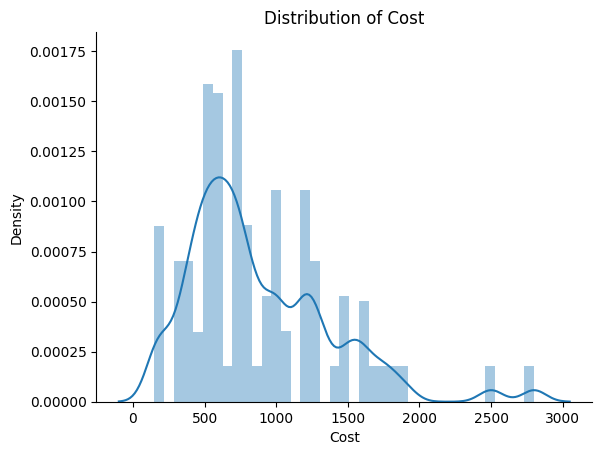

In [133]:
#distribution of cost
sns.distplot(merged['Cost'])
plt.title("Distribution of Cost")
sns.despine()

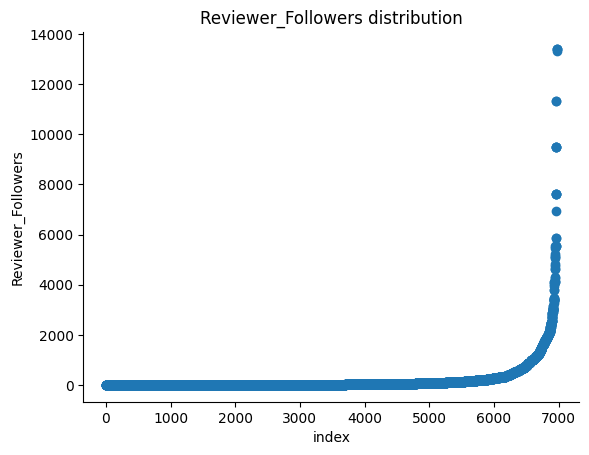

In [134]:
#plot for reviewer follower
plt.scatter(range(merged.shape[0]), np.sort(merged['Reviewer_Followers'].values))
plt.xlabel('index')
plt.ylabel('Reviewer_Followers')
plt.title("Reviewer_Followers distribution")
sns.despine()

/tmp/ipython-input-135-1081979569.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged['Reviewer_Followers'])


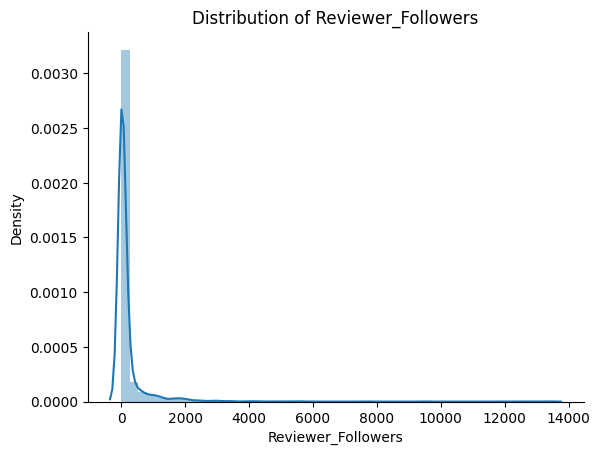

In [135]:
#distribution of Reviewer_Followers
sns.distplot(merged['Reviewer_Followers'])
plt.title("Distribution of Reviewer_Followers")
sns.despine()


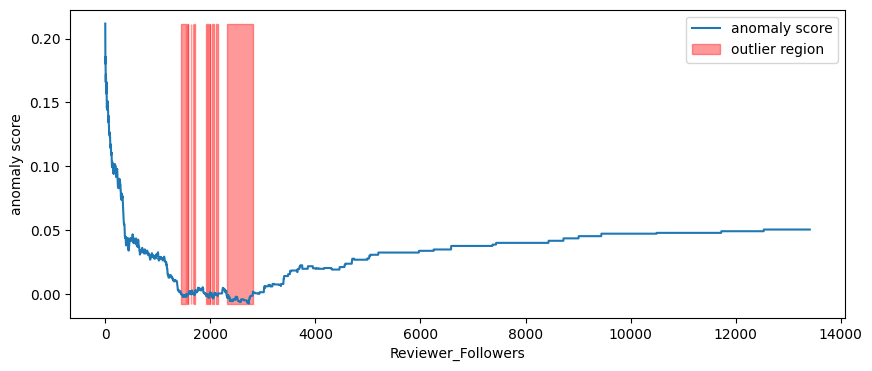

In [136]:
#Anamoly detection
from sklearn.ensemble import IsolationForest

#isolation forest for anamoly detection of reviewer follower
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(merged['Reviewer_Followers'].values.reshape(-1, 1))
merged['anomaly_score_univariate_follower'] = isolation_forest.decision_function(
    merged['Reviewer_Followers'].values.reshape(-1, 1))
merged['outlier_univariate_follower'] = isolation_forest.predict(
    merged['Reviewer_Followers'].values.reshape(-1, 1))

#chat to visualize outliers in reviwer follower column
xx = np.linspace(merged['Reviewer_Followers'].min(), merged['Reviewer_Followers'].max(), len(merged)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
where=outlier==-1, color='r',
alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Reviewer_Followers')
plt.show();


##### What all outlier treatment techniques have you used and why did you use those techniques?

To treat outliers, I observed that features like Cost and Reviewer_Followers showed a positively skewed distribution and contained outliers, as identified using the Isolation Forest technique. Instead of removing them, I applied the capping technique using the IQR (Interquartile Range) method, which replaces extreme values beyond the lower and upper bounds with the respective thresholds. This approach preserves the data structure while reducing the impact of extreme values on the model.

### 3. Categorical Encoding

In [137]:
# Encode your categorical columns

#categorial encoding using pd.getdummies
#new df with important categories
cluster_dummy = hotel[['Restaurant','Cuisines']]
#spliting cuisines as they are separted with comma and converting into list
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].str.split(',')
#using explode converting list to unique individual items
cluster_dummy = cluster_dummy.explode('Cuisines')
#removing extra trailing space from cuisines after exploded
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].apply(lambda x: x.strip())
#using get dummies to get dummies for cuisines
cluster_dummy = pd.get_dummies(cluster_dummy, columns=["Cuisines"], prefix=["Cuisines"])

#checking if the values are correct
# cluster_dummy.loc[:, cluster_dummy.columns.str.startswith('Cuisines_')].eq(1)[:5].T
cluster_dummy.loc[:, cluster_dummy.columns.str.startswith('Cuisines_')].idxmax(1)[:6]

#replacing cuisines_ from columns name - for better understanding run seperatly

# cluster_dummy.columns = cluster_dummy.columns.str.replace(" ","")
cluster_dummy.columns = cluster_dummy.columns.str.replace("Cuisines_","")
# cluster_dummy = cluster_dummy.groupby(cluster_dummy.columns, axis=1).sum()

#grouping each restaurant as explode created unnecessary rows
cluster_dummy = cluster_dummy.groupby("Restaurant").sum().reset_index()

#total cuisine count
hotel['Total_Cuisine_Count'] = hotel['Cuisines'].apply(lambda x : len(x.split(',')))

#adding average rating - will remove 5 unrated restaurant from 105 restaurant
avg_metadata_rating.rename(columns = {'Rating':'Average_Rating'}, inplace =True)
hotel = hotel.merge(avg_metadata_rating[['Average_Rating','Restaurant']], on = 'Restaurant')
hotel.head(1)

/tmp/ipython-input-137-1559944461.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].str.split(',')


,Restaurant,Links,Cost,Collections,Cuisines,Timings,Total_Cuisine_Count,Average_Rating
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants In Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12Noon To 3:30Pm, 6:30Pm To 11:30Pm (Mon-Sun)",6,4.28


In [138]:
#adding cost column to the new dataset
cluster_dummy = hotel[['Restaurant','Cost','Average_Rating','Total_Cuisine_Count'
                      ]].merge(cluster_dummy, on = 'Restaurant')
cluster_dummy.shape

(84, 48)

In [139]:
#creating data frame for categorial encoding
cluster_df = hotel[['Restaurant','Cuisines','Cost','Average_Rating','Total_Cuisine_Count']]

#creating new dataframe for clustering
cluster_df = pd.concat([cluster_df,pd.DataFrame(columns=list(cuisine_dict.keys()))])

In [140]:
#creating categorial feature for cuisine
#iterate over every row in the dataframe
for i, row in cluster_df.iterrows():
  # iterate over the new columns
  for column in list(cluster_df.columns):
      if column not in ['Restaurant','Cost','Cuisines','Average_Rating','Total_Cuisine_Count']:
        # checking if the column is in the list of cuisines available for that row
        if column in row['Cuisines']:
          #assign it as 1 else 0
          cluster_df.loc[i,column] = 1
        else:
          cluster_df.loc[i,column] = 0
cluster_df.head(3).T

,0,1,2
Restaurant,Beyond Flavours,Paradise,Flechazo
Cuisines,"Chinese, Continental, Kebab, European, South I...","Biryani, North Indian, Chinese","Asian, Mediterranean, North Indian, Desserts"
Cost,800.0,800.0,1300.0
Average_Rating,4.28,4.7,4.66
Total_Cuisine_Count,6.0,3.0,4.0
Chinese,1,1,0
Continental,1,0,0
Kebab,1,0,0
European,1,0,0
South Indian,1,0,0


### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [141]:
#creating new df for text processing of sentiment analysis
sentiment_df = review[['Reviewer','Restaurant','Rating','Review']]
#analysing two random sample
sentiment_df.sample(2)

,Reviewer,Restaurant,Rating,Review
3246,Syeda @food__vampire,Marsala Food Company,5.0,It was a lunch and was very hungry thought to ...
3644,Rishabh Kumar,Banana Leaf Multicuisine Restaurant,4.0,I visited this place twice to have their buffe...


In [142]:
#setting index
sentiment_df = sentiment_df.reset_index()
sentiment_df['index'] = sentiment_df.index
sentiment_df.sample(2)

,index,Reviewer,Restaurant,Rating,Review
1933,1933,Avinash,Pakwaan Grand,4.0,I and my colleague missed our lunch due to the...
3692,3692,Boge Srikanth,Banana Leaf Multicuisine Restaurant,1.0,The worst biryani and tandoori I ever had! Loo...


#### 2. Lower Casing

In [143]:
# Lower Casing
sentiment_df['Review'] = sentiment_df['Review'].str.lower()
sentiment_df.head()

,index,Reviewer,Restaurant,Rating,Review
0,0,Rusha Chakraborty,Beyond Flavours,5.0,"the ambience was good, food was quite good . h..."
1,1,Anusha Tirumalaneedi,Beyond Flavours,5.0,ambience is too good for a pleasant evening. s...
2,2,Ashok Shekhawat,Beyond Flavours,5.0,a must try.. great food great ambience. thnx f...
3,3,Swapnil Sarkar,Beyond Flavours,5.0,soumen das and arun was a great guy. only beca...
4,4,Dileep,Beyond Flavours,5.0,food is good.we ordered kodi drumsticks and ba...


#### 3. Removing Punctuations

In [144]:
# Remove Punctuations
import string
def remove_punctuation(text):
  '''a function for removing punctuation'''

  # replacing the punctuations with no space,
  # which in effect deletes the punctuation marks
  translator = str.maketrans('', '', string.punctuation)
  # return the text stripped of punctuation marks
  return text.translate(translator)
#remove punctuation using function created
sentiment_df['Review'] = sentiment_df['Review'].apply(remove_punctuation)
sentiment_df.sample(5)

,index,Reviewer,Restaurant,Rating,Review
8368,8368,Grk Sumanth,GD's,4.0,this happened on a pleasant 🌇 while i decided ...
1941,1941,Chandrasekhar Sahoo,Pakwaan Grand,1.0,this food is very worst i have no words to say...
9463,9463,Akhilesh Khemka,Desi Bytes,4.0,litti chokha was yummy although delivery took ...
4274,4274,Dhruv Gupta,Karachi Cafe,4.0,the ambience reminds you of all the 90s things...
5780,5780,Siddharth Pandey,Being Hungry,2.0,dal was really bad and chinese veg manchurian ...


#### 4. Removing URLs & Removing words and digits contain digits.

In [145]:
# Remove URLs & Remove words and digits contain digits
import re

# Remove links
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"http\S+", "", x))

# Remove digits
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"\d+", "", x))
#function to extract location of the restaurant
def get_location(link):
  link_elements = link.split("/")
  return link_elements[3]

#create a location feature
hotel['Location'] = hotel['Links'].apply(get_location)
hotel.sample(2)

,Restaurant,Links,Cost,Collections,Cuisines,Timings,Total_Cuisine_Count,Average_Rating,Location
67,Tandoori Food Works,https://www.zomato.com/hyderabad/tandoori-food...,500.0,Brilliant Biryanis,"North Indian, Burger, Kebab","12Noon To 12Midnight (Mon, Tue, Wed, Thu, Sun)...",3,3.270000,hyderabad
52,Hyderabad Chefs,https://www.zomato.com/hyderabad/hyderabad-che...,600.0,Unknown,"North Indian, Chinese",12 Noon To 10:30 Pm,2,3.785714,hyderabad


#### 5. Removing Stopwords & Removing White spaces

In [146]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# Remove Stopwords
# extracting the stopwords from nltk library
sw = stopwords.words('english')
#function to remove stopwords
def delete_stopwords(text):
  '''a function for removing the stopword'''
  # removing the stop words and lowercasing the selected words
  text = [word.lower() for word in text.split() if word.lower() not in sw]
  # joining the list of words with space separator
  return " ".join(text)
#calling function to remove stopwords
sentiment_df['Review'] = sentiment_df['Review'].apply(delete_stopwords)
# Remove White spaces
sentiment_df['Review'] =sentiment_df['Review'].apply(lambda x: " ".join(x.split()))
#random sample
sentiment_df.sample(2)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,index,Reviewer,Restaurant,Rating,Review
5040,5040,Manorama Rao,Gal Punjab Di,3.0,small restaurant staff professional food would...
1861,1861,Jagannadh Chowdary,10 Downing Street,4.0,superb place cool place hangout terrace seatin...


In [147]:
# Remove White spaces

#### 6. Rephrase Text

In [148]:
# Rephrase Text
sentiment_df.sample(2)

,index,Reviewer,Restaurant,Rating,Review
7126,7126,Pratik Agarwal,Eat India Company,5.0,visited place twice love food ambience service...
719,719,Chinna,Shah Ghouse Spl Shawarma,5.0,best shawarma near gachibowli affordable worth...


#### 8. Text Normalization

In [149]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')  # Optional: for additional lemmatizer data
from nltk.stem import WordNetLemmatizer
import nltk

# Download required data
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize a word
print(lemmatizer.lemmatize("running"))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


running


##### Which text normalization technique have you used and why?

I used lemmatization as the text normalization technique because it reduces words to their meaningful base form while considering context and grammar. Unlike stemming, which just trims suffixes, lemmatization uses a dictionary-based approach to ensure accuracy. This helps preserve the actual meaning of words, which is crucial in tasks like sentiment analysis, text classification, and information retrieval, making the processed text more reliable and interpretable for modeling.

#### 10. Text Vectorization

In [150]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [151]:
# Manipulate Features to minimize feature correlation and create new features
hotel.shape

(84, 9)

In [152]:
hotel.columns

Index(['Restaurant', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings',
       'Total_Cuisine_Count', 'Average_Rating', 'Location'],
      dtype='object')

In [153]:
#dropping columns
hotel = hotel.drop(columns = ['Links','Location'], axis = 1)

In [154]:
hotel.shape

(84, 7)

In [155]:
cluster_df.shape

(84, 49)

In [156]:
cluster_df = cluster_df.drop(columns = ['Restaurant','Cuisines'], axis = 1)

In [157]:
cluster_df.sample(1)

,Cost,Average_Rating,Total_Cuisine_Count,Chinese,Continental,Kebab,European,South Indian,North Indian,Biryani,...,Spanish,Wraps,Thai,Indonesian,Modern Indian,Momos,Pizza,North Eastern,Mithai,Malaysian
48,350.0,3.85,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [158]:
#alternatively using other variable created earlier during categorial creation
cluster_dummy.shape

(84, 48)

In [159]:
#review data shape
reviews_copy.shape

(9954, 14)

In [160]:
reviews_copy.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', 'Sentiment', 'Review_Length', 'Reviewer_Total_Review',
       'Reviewer_Followers', 'Review_Year', 'Review_Month', 'Review_Hour'],
      dtype='object')

In [161]:
#creating new binary feature called sentiment based on rating which has 1 = positive and 0 = negative
sentiment_df['Sentiment'] = sentiment_df['Rating'].apply(
    lambda x: 1 if x >=sentiment_df['Rating'].mean() else 0)  #1 = positive # 0 = negative

#sentiment data frame
sentiment_df.sample(2)

,index,Reviewer,Restaurant,Rating,Review,Sentiment
8857,8857,Shantanusharma1991,Domino's Pizza,4.0,right time time,1
5445,5445,Datla Raveendra Varma (ravi Varma),Asian Meal Box,1.0,spicy opted plain noodles even tasting good,0


#### 2. Feature Selection

In [162]:
hotel.columns

Index(['Restaurant', 'Cost', 'Collections', 'Cuisines', 'Timings',
       'Total_Cuisine_Count', 'Average_Rating'],
      dtype='object')

In [163]:
#feature selcted for clustering
cluster_df.columns

Index(['Cost', 'Average_Rating', 'Total_Cuisine_Count', 'Chinese',
       'Continental', 'Kebab', 'European', 'South Indian', 'North Indian',
       'Biryani', 'Asian', 'Mediterranean', 'Desserts', 'Seafood', 'Beverages',
       'Goan', 'Healthy Food', 'Lebanese', 'American', 'Ice Cream',
       'Street Food', 'Fast Food', 'Bbq', 'Italian', 'Finger Food', 'Burger',
       'Japanese', 'Salad', 'Sushi', 'Mexican', 'Mughlai', 'Andhra', 'Bakery',
       'Juices', 'Arabian', 'Hyderabadi', 'Cafe', 'Spanish', 'Wraps', 'Thai',
       'Indonesian', 'Modern Indian', 'Momos', 'Pizza', 'North Eastern',
       'Mithai', 'Malaysian'],
      dtype='object')

In [164]:
cluster_dummy.columns

Index(['Restaurant', 'Cost', 'Average_Rating', 'Total_Cuisine_Count',
       'American', 'Andhra', 'Arabian', 'Asian', 'Bakery', 'Bbq', 'Beverages',
       'Biryani', 'Burger', 'Cafe', 'Chinese', 'Continental', 'Desserts',
       'European', 'Fast Food', 'Finger Food', 'Goan', 'Healthy Food',
       'Hyderabadi', 'Ice Cream', 'Indonesian', 'Italian', 'Japanese',
       'Juices', 'Kebab', 'Lebanese', 'Malaysian', 'Mediterranean', 'Mexican',
       'Mithai', 'Modern Indian', 'Momos', 'Mughlai', 'North Eastern',
       'North Indian', 'Pizza', 'Salad', 'Seafood', 'South Indian', 'Spanish',
       'Street Food', 'Sushi', 'Thai', 'Wraps'],
      dtype='object')

In [165]:
reviews_copy.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', 'Sentiment', 'Review_Length', 'Reviewer_Total_Review',
       'Reviewer_Followers', 'Review_Year', 'Review_Month', 'Review_Hour'],
      dtype='object')

In [166]:
#feature selected for sentiment analysis
sentiment_df.columns


Index(['index', 'Reviewer', 'Restaurant', 'Rating', 'Review', 'Sentiment'], dtype='object')

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

I will be usign PCA for feature selection, which will be again beneficial for dimensional reduction, therefore will do the needfull in the precedding step.

The goal of PCA is to identify the most important variables or features that capture the most variation in the data, and then to project the data onto a lower-dimensional space while preserving as much of the variance as possible.

### 5. Data Transformation

In [167]:
# Getting symmetric and skew symmetric features from the cplumns
symmetric_feature=[]
non_symmetric_feature=[]
for i in cluster_df.describe().columns:
  if abs(cluster_df[i].mean()-cluster_df[i].median())<0.1:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['Average_Rating', 'Total_Cuisine_Count']
Skew Symmetric Distributed Features : - ['Cost']


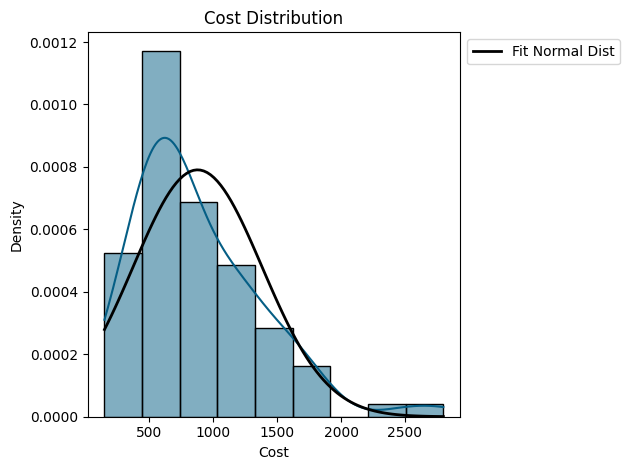

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# Transform Your data
for i, col in enumerate(['Cost']):
    sns.histplot(cluster_df[col], color='#055E85', kde=True, stat="density")

    # Fit normal distribution manually
    feature = cluster_df[col]
    mu, std = norm.fit(feature.dropna())  # avoid NaNs
    xmin, xmax = feature.min(), feature.max()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2, label='Fit Normal Dist')

    plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
    plt.title(f'{col.title()} Distribution')
    plt.tight_layout()
    plt.show()


### Data Scaling

In [169]:
# Scaling your data
cluster_dummy.sample(5)

,Restaurant,Cost,Average_Rating,Total_Cuisine_Count,American,Andhra,Arabian,Asian,Bakery,Bbq,...,North Indian,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps
26,Green Bawarchi Restaurant,700.0,3.490000,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
82,Triptify,400.0,3.550000,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
66,Olive Garden,700.0,3.767677,4,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
28,Kritunga Restaurant,500.0,3.470000,4,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
31,Frio Bistro,1200.0,3.610000,4,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [170]:
# Normalize the correct numerical columns (matching exact column names)
numerical_cols = ['Cost', 'Total_Cuisine_Count', 'Average_Rating']

# Remove any extra whitespace just in case
cluster_dummy.columns = cluster_dummy.columns.str.strip()

# Scaling
scaler = StandardScaler()
scaler.fit(cluster_dummy[numerical_cols])

# Apply transformation
scaled_df = cluster_dummy.copy()
scaled_df[numerical_cols] = scaler.transform(cluster_dummy[numerical_cols])

In [171]:
print(cluster_dummy.columns.tolist())

['Restaurant', 'Cost', 'Average_Rating', 'Total_Cuisine_Count', 'American', 'Andhra', 'Arabian', 'Asian', 'Bakery', 'Bbq', 'Beverages', 'Biryani', 'Burger', 'Cafe', 'Chinese', 'Continental', 'Desserts', 'European', 'Fast Food', 'Finger Food', 'Goan', 'Healthy Food', 'Hyderabadi', 'Ice Cream', 'Indonesian', 'Italian', 'Japanese', 'Juices', 'Kebab', 'Lebanese', 'Malaysian', 'Mediterranean', 'Mexican', 'Mithai', 'Modern Indian', 'Momos', 'Mughlai', 'North Eastern', 'North Indian', 'Pizza', 'Salad', 'Seafood', 'South Indian', 'Spanish', 'Street Food', 'Sushi', 'Thai', 'Wraps']


##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [172]:
from sklearn.preprocessing import StandardScaler

# Define the columns to scale
numerical_cols = ['Cost', 'Total_Cuisine_Count', 'Average_Rating']

# Strip column names to remove hidden spaces (important!)
cluster_dummy.columns = cluster_dummy.columns.str.strip()

# Check if columns exist
missing_cols = [col for col in numerical_cols if col not in cluster_dummy.columns]
if missing_cols:
    print("Missing columns:", missing_cols)
else:
    # Apply scaling
    scaler = StandardScaler()
    scaler.fit(cluster_dummy[numerical_cols])
    scaled_df = cluster_dummy.copy()
    scaled_df[numerical_cols] = scaler.transform(cluster_dummy[numerical_cols])

    # ✅ Now this will work
    scaled_df.set_index(['Restaurant'], inplace=True)


In [173]:
# --- Import Required Libraries ---
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# --- Sample Input DataFrame ---
# Ensure `cluster_dummy` exists
# For example (skip if already loaded):
# cluster_dummy = pd.read_csv("your_cleaned_data.csv")

# --- Clean column names ---
cluster_dummy.columns = cluster_dummy.columns.str.strip()

# --- Define numerical columns for scaling ---
numerical_cols = ['Cost', 'Total_Cuisine_Count', 'Average_Rating']

# --- Check if numerical columns exist ---
missing_cols = [col for col in numerical_cols if col not in cluster_dummy.columns]
if missing_cols:
    print(f"Missing columns in dataset: {missing_cols}")
else:
    # --- Scale numerical columns ---
    scaler = StandardScaler()
    scaled_df = cluster_dummy.copy()
    scaled_df[numerical_cols] = scaler.fit_transform(cluster_dummy[numerical_cols])

    # --- Set Restaurant as index ---
    if 'Restaurant' in scaled_df.columns:
        scaled_df.set_index('Restaurant', inplace=True)
    else:
        print("Column 'Restaurant' not found. Skipping index setting.")

    # --- Apply PCA ---
    pca = PCA()
    pca_data = pca.fit_transform(scaled_df)

    # --- Convert PCA output to DataFrame ---
    pca_df = pd.DataFrame(pca_data, index=scaled_df.index,
                          columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])

    # --- View PCA Explained Variance ---
    print("Explained Variance Ratio:")
    print(pca.explained_variance_ratio_)

    # --- Optional: View result ---
    print("\nPCA Data (first 5 rows):")
    print(pca_df.head())


Explained Variance Ratio:
[3.33282568e-01 2.01015771e-01 1.02616550e-01 6.08778312e-02
 3.36915676e-02 2.99420601e-02 2.53298743e-02 2.21321628e-02
 1.74640218e-02 1.68807732e-02 1.53653469e-02 1.47049507e-02
 1.24352298e-02 1.11946854e-02 1.01590945e-02 9.18257744e-03
 8.14777435e-03 8.09247307e-03 7.27287468e-03 6.76354251e-03
 6.09830155e-03 5.28349894e-03 5.01340251e-03 4.51518455e-03
 4.23860875e-03 3.81354241e-03 3.61935143e-03 3.36323455e-03
 3.04187059e-03 2.69781601e-03 2.54593859e-03 2.10198266e-03
 1.29801665e-03 1.24292753e-03 1.10001355e-03 1.08273885e-03
 9.21313146e-04 7.63065882e-04 4.69602750e-04 2.37859559e-04
 6.57283971e-32 1.89476200e-33 1.89476200e-33 1.89476200e-33
 1.89476200e-33 1.89476200e-33 1.89476200e-33]

PCA Data (first 5 rows):
                                     PC1       PC2       PC3       PC4  \
Restaurant                                                               
Beyond Flavours                 2.027684  1.208824 -1.870751  0.327861   
Paradise

In [174]:
PCA()

PCA()

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I used PCA (Principal Component Analysis) as the dimensionality reduction technique because it helps reduce the number of features while retaining most of the important variance in the dataset. PCA transforms the original correlated variables into a set of uncorrelated components, making the data easier to work with for clustering. It is especially useful before applying K-Means, as it removes noise and redundancy, which can improve clustering quality and interpretability. PCA also enables effective 2D or 3D visualization of high-dimensional data, making it easier to understand the underlying structure of the clusters.

### 8. Data Splitting

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Confirm this is the actual column name
print(sentiment_df.columns)

# Use the correct column name here
X_text = sentiment_df['Review']  # Replace 'Review' with actual column
y = sentiment_df['Sentiment']   # Sentiment column as target

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X_text)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

# Output shapes
print("TF-IDF shape:", X_tfidf.shape)
print("Training set:", X_train.shape)
print("Test set:", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)
print("Number transactions y_train dataset: ", y_train.shape)


Index(['index', 'Reviewer', 'Restaurant', 'Rating', 'Review', 'Sentiment'], dtype='object')
TF-IDF shape: (9954, 5000)
Training set: (7963, 5000)
Test set: (1991, 5000)
Number transactions y_test dataset:  (1991,)
Number transactions y_train dataset:  (7963,)


##### What data splitting ratio have you used and why?

I have used 80:20 split which is one the most used split ratio. Since there was only 9961 data, therefore I have used more in training set.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Using class imbalance ratio (CIR) to measure data imbalance. The CIR is calculated as the ratio of the number of observations in the majority class (Nm) to the number of observations in the minority class (Nm). The CIR can be expressed as: CIR = Nm / Ns, where Nm is the number of observations in the majority class and Ns is the number of observations in the minority class.

In [176]:
#getting the value count for target class
vc = sentiment_df.Sentiment.value_counts().reset_index().rename(columns =
            {'index':'Sentiment','Sentiment':'Count'})
#defining majority and minority class value
majority_class = vc.Count[0]
minority_class = vc.Count[1]
#calculating cir value for checking class imbalance
CIR = majority_class / minority_class
CIR

/tmp/ipython-input-176-523394981.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  CIR = majority_class / minority_class


inf

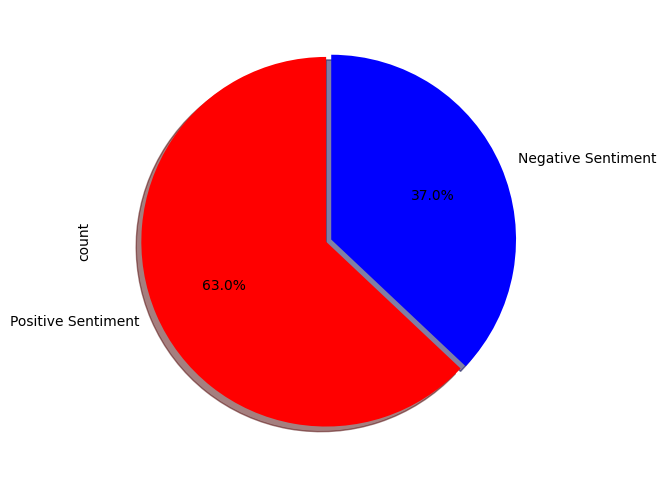

In [177]:
# Dependant Variable Column Visualization
sentiment_df['Sentiment'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Positive Sentiment','Negative Sentiment'],
                               colors=['red','blue'],
                               explode=[0.01,0.02]
                              )
plt.show()

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Yes, there is imbalance in dataset with 60: 40 ratio, where 60 is the majaority class and 40 is the minority class. Even the CIR score suggest that majority class is 1.73 times greater than minority class. However it is considered as slight imbalance, therefore not performing any under or over sampling technique i.e., not required to treat class imabalance.

## ***7. ML Model Implementation***

### ML Model - 1    Clustering

### KMeans Clustering
K-Means Clustering is an Unsupervised Learning algorithm.The algorithm takes the unlabeled dataset as input, divides the dataset into k-number of clusters, and repeats the process until it does not find the best clusters. The value of k should be predetermined in this algorithm.

It is a centroid-based algorithm, where each cluster is associated with a centroid. The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.

The k-means clustering algorithm mainly performs two tasks:

Determines the best value for K center points or centroids by an iterative process.

Assigns each data point to its closest k-center. Those data points which are near to the particular k-center, create a cluster.

#### ELBOW METHOD

- This method uses the concept of WCSS value. WCSS stands for Within Cluster Sum of Squares, which defines the total variations within a cluster.

#### SILHOUETTE METHOD

- The silhouette coefficient or silhouette score kmeans is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation).

In [178]:
# ML Model - 1 Implementation
#importing kmeans
from sklearn.cluster import KMeans

In [179]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(reviews['Review'].astype(str))  # or any column with text
from sklearn.decomposition import PCA

# Reduce to 2 dimensions for visualization (or more as needed)
pca = PCA(n_components=2, random_state=42)
df_pca = pca.fit_transform(X_tfidf.toarray())  # convert sparse matrix to dense

In [180]:
#Within Cluster Sum of Squared Errors(WCSS) for different values of k
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state = 20)
    km.fit(df_pca)
    wcss.append(km.inertia_)

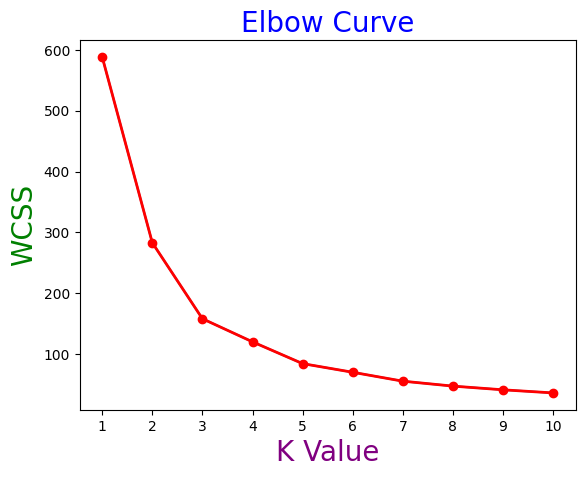

In [183]:
#elbow curve
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="o")
plt.xlabel("K Value", size = 20, color = 'purple')
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS", size = 20, color = 'green')
plt.title('Elbow Curve', size = 20, color = 'blue')
plt.show()

For n_clusters = 2 average silhouette_score is : 0.3172


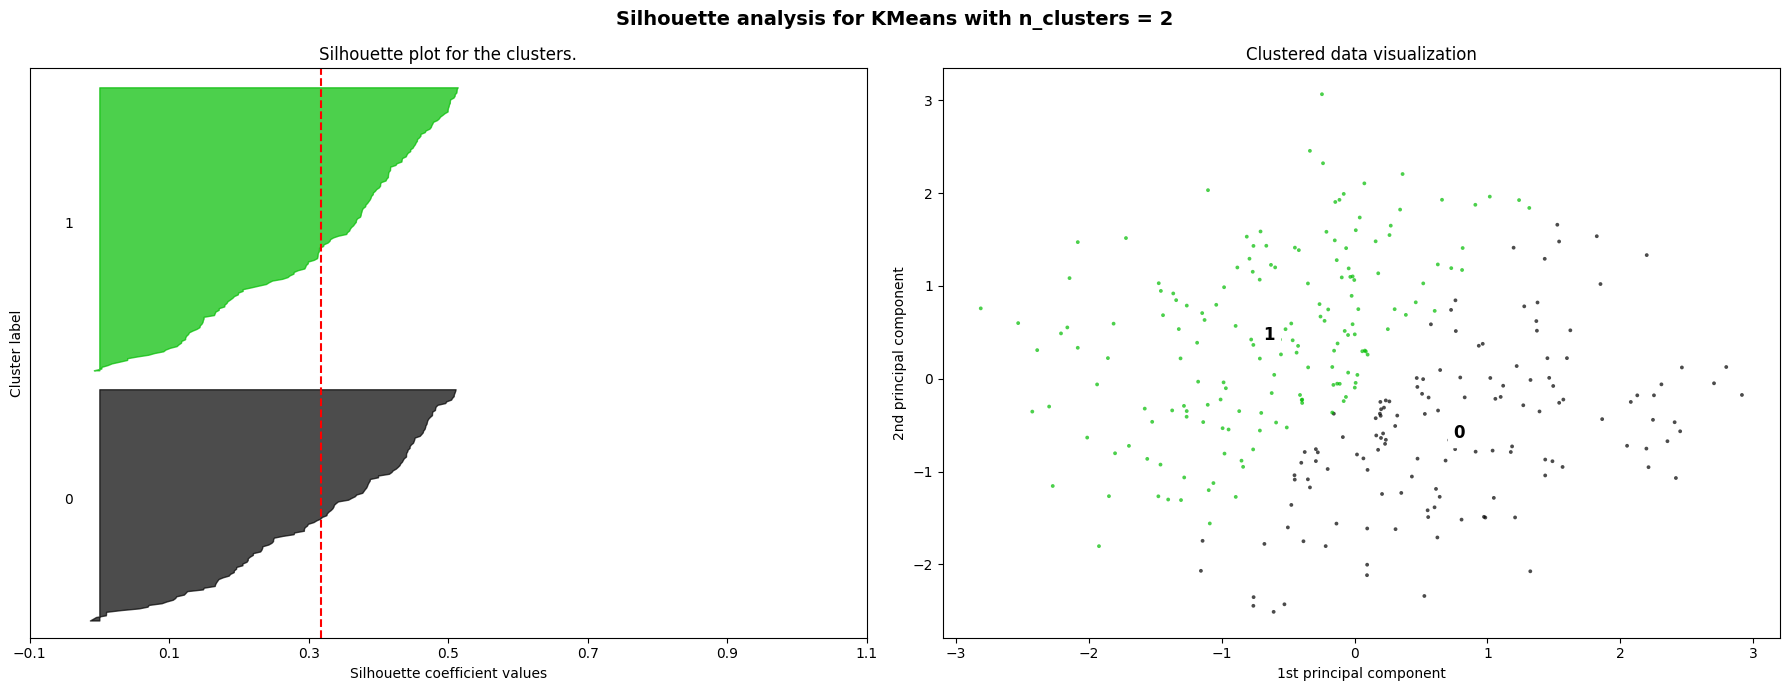

For n_clusters = 3 average silhouette_score is : 0.3526


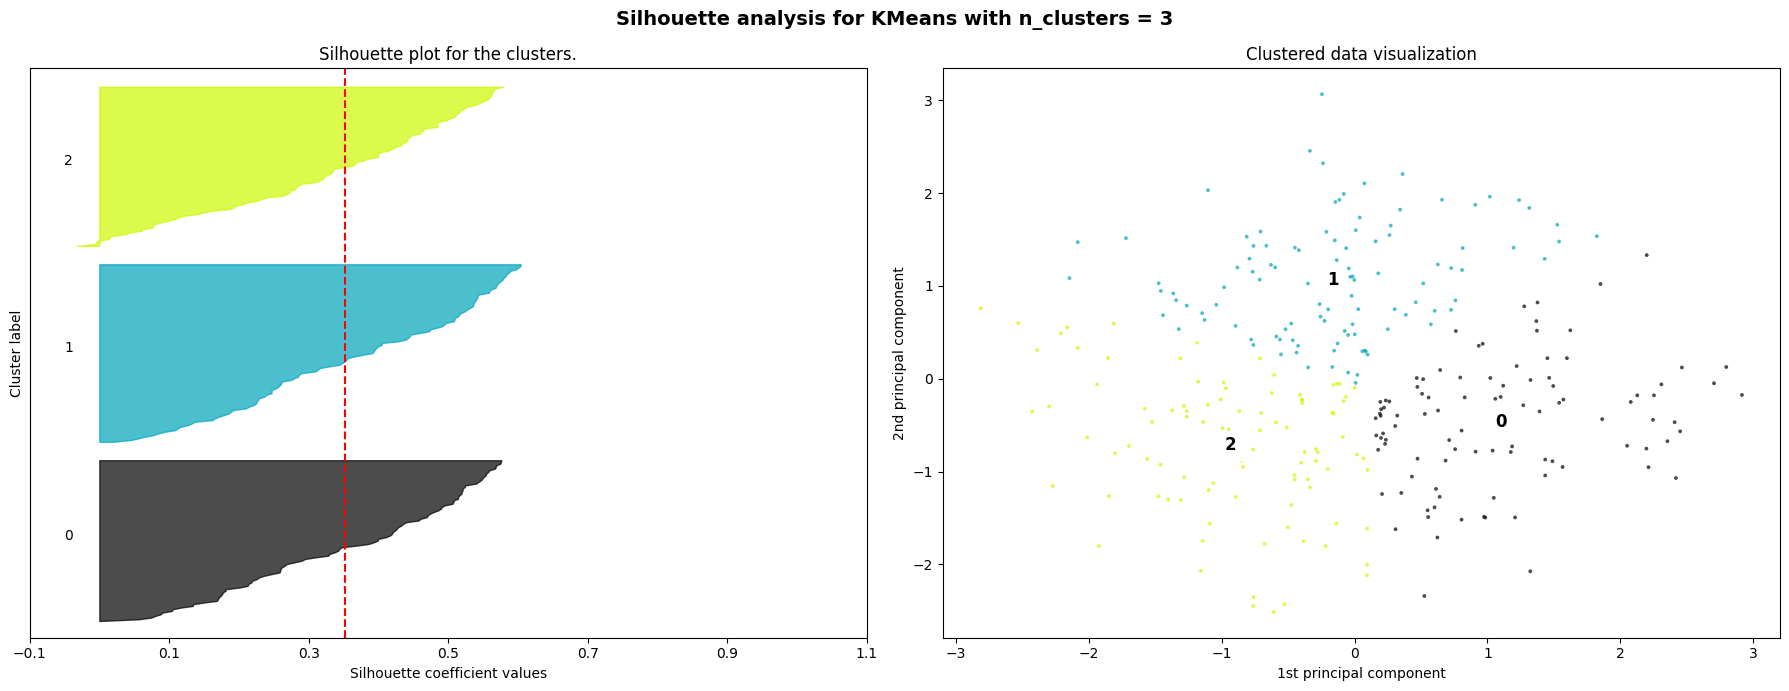

For n_clusters = 4 average silhouette_score is : 0.3535


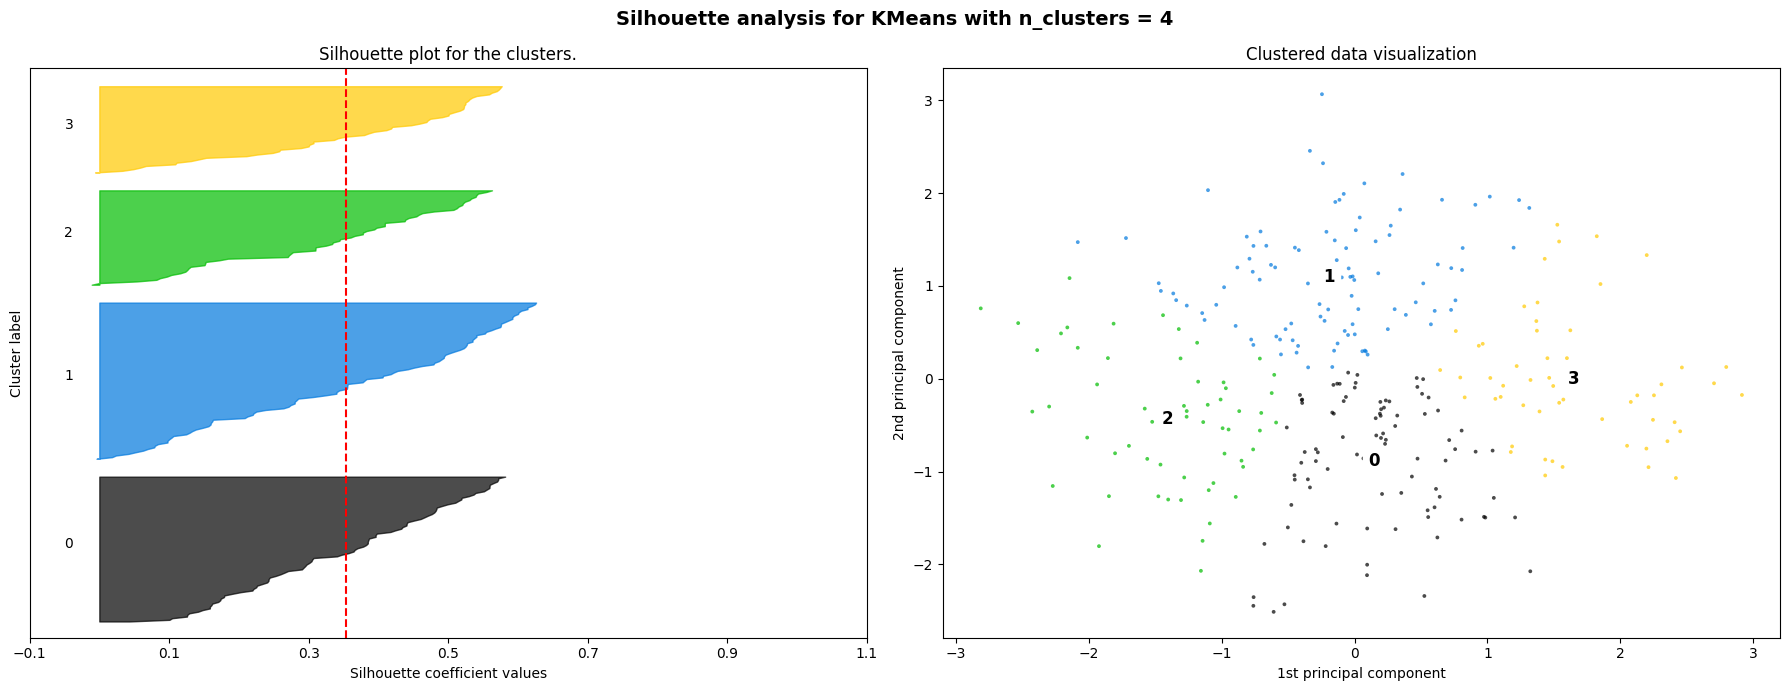

For n_clusters = 5 average silhouette_score is : 0.3366


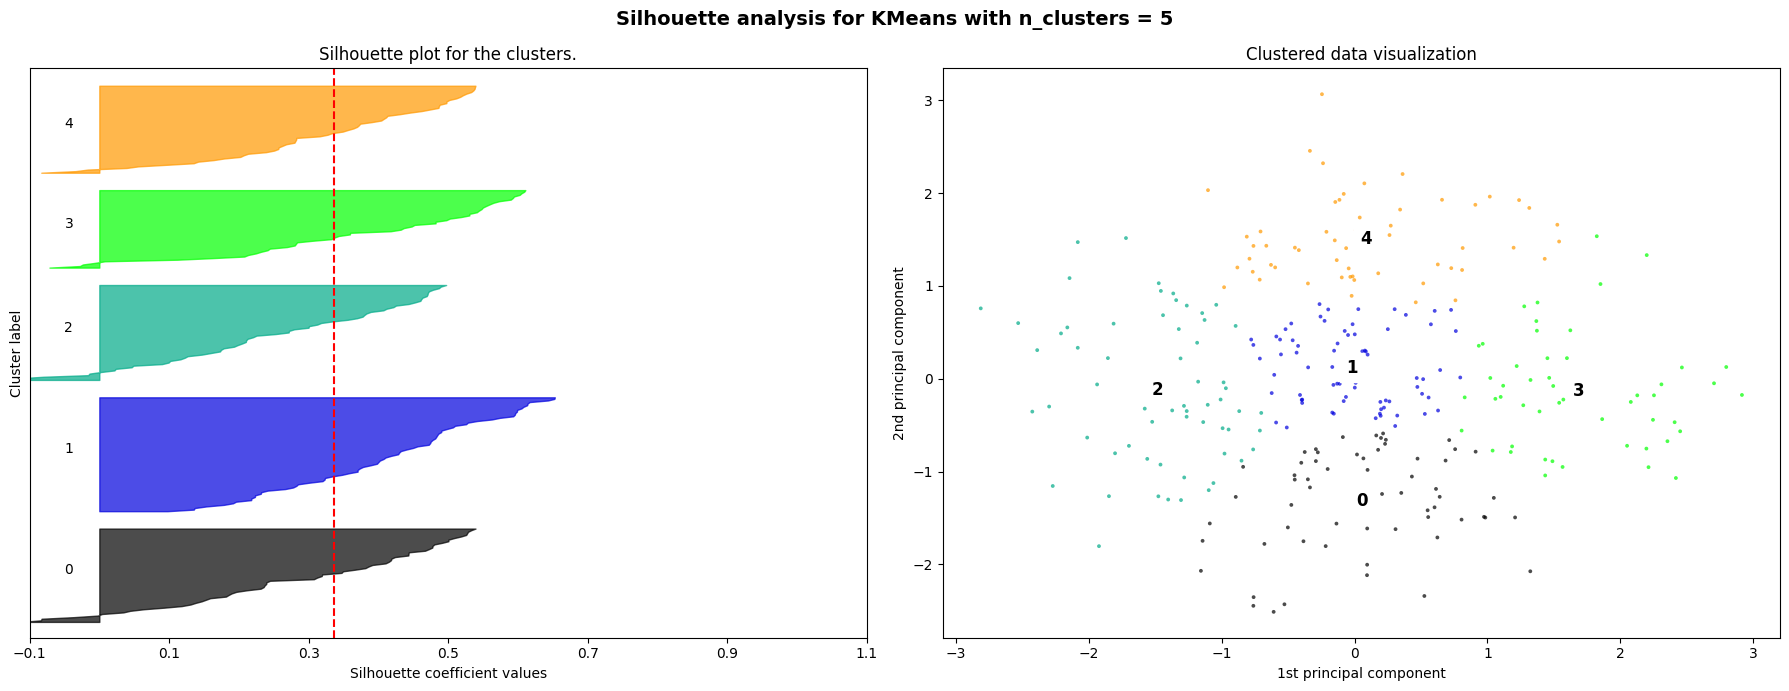

For n_clusters = 6 average silhouette_score is : 0.333


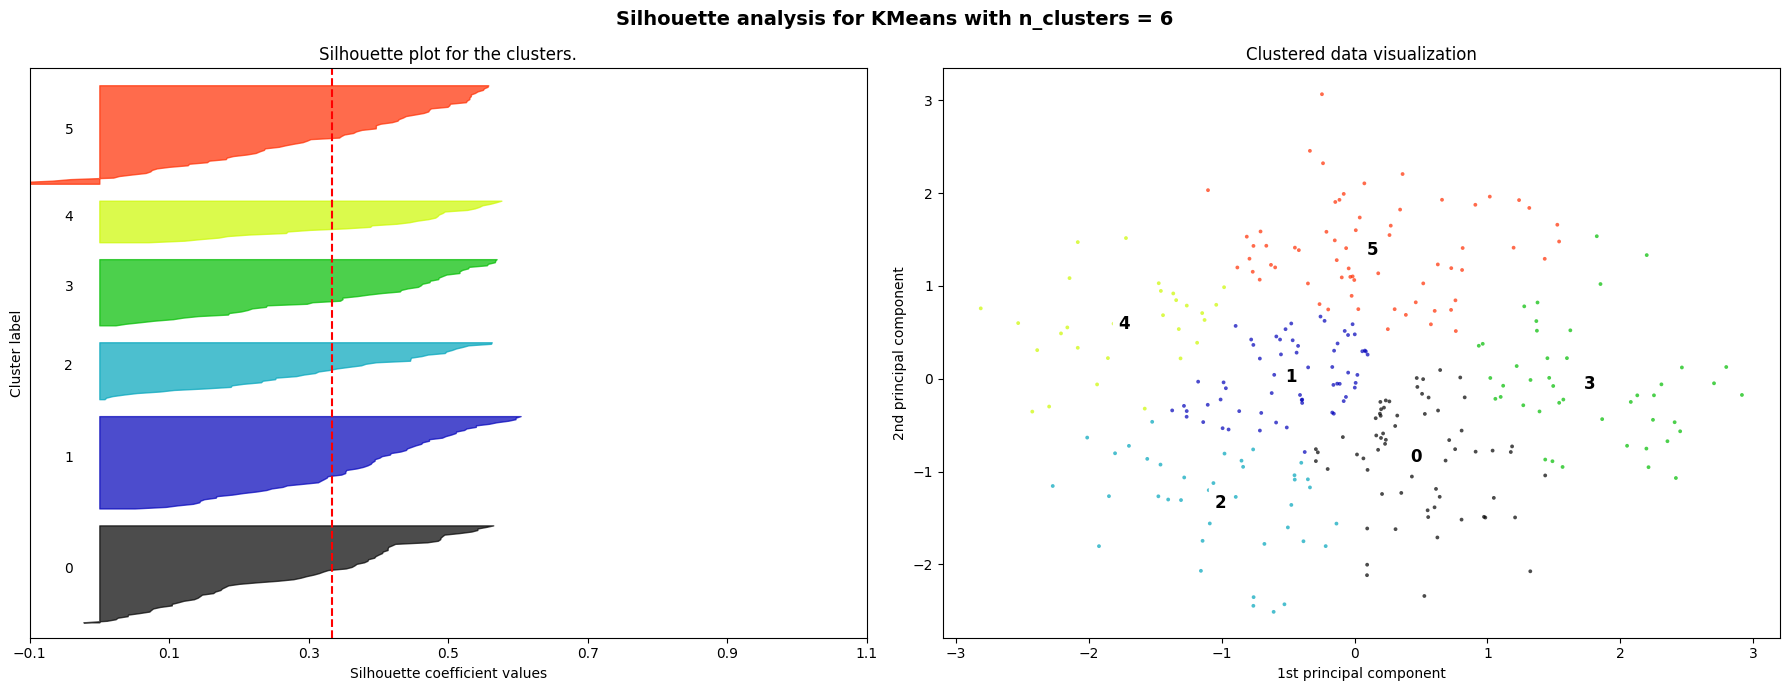

For n_clusters = 7 average silhouette_score is : 0.3461


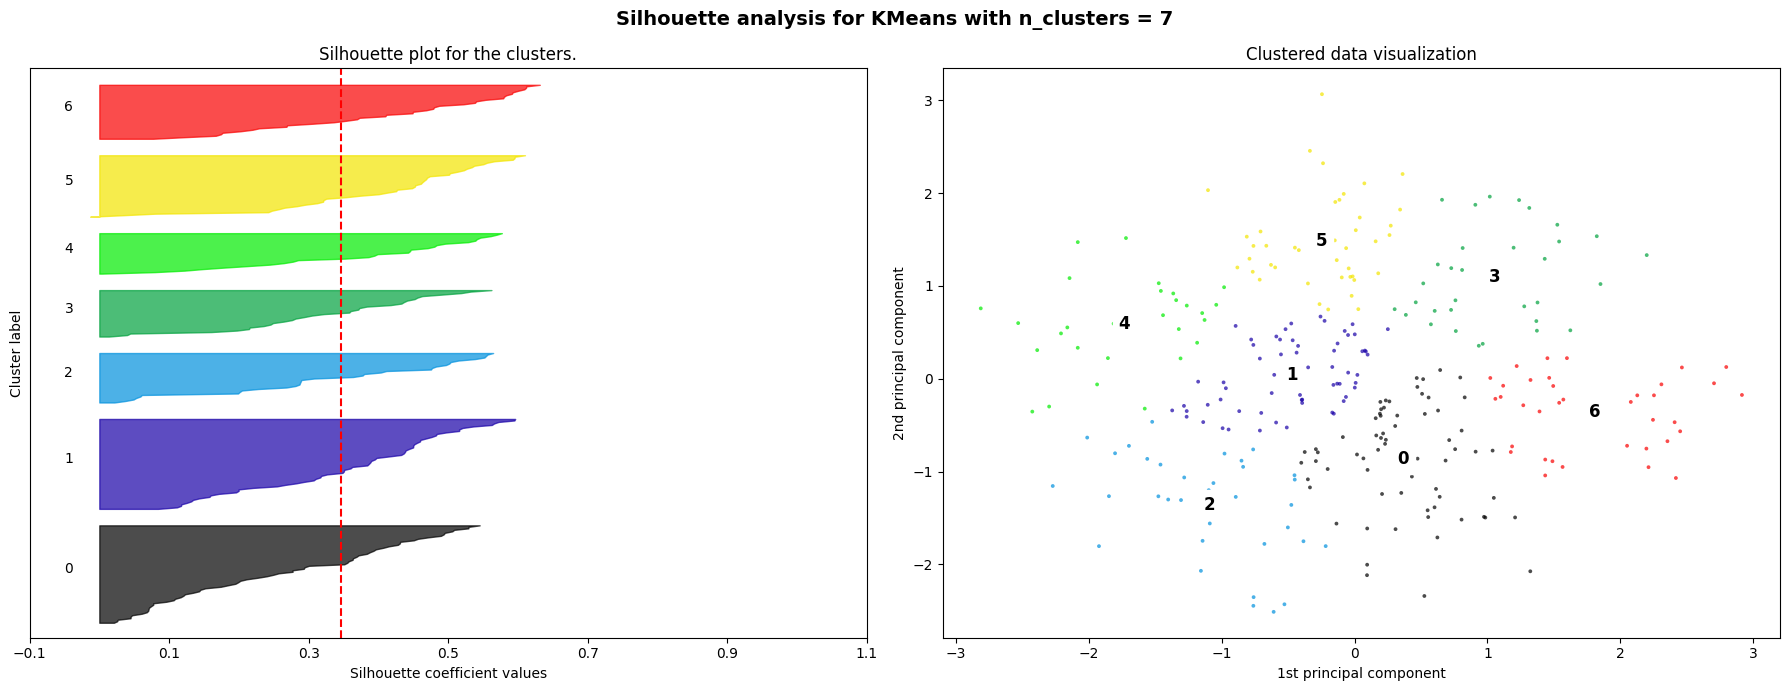

For n_clusters = 8 average silhouette_score is : 0.3376


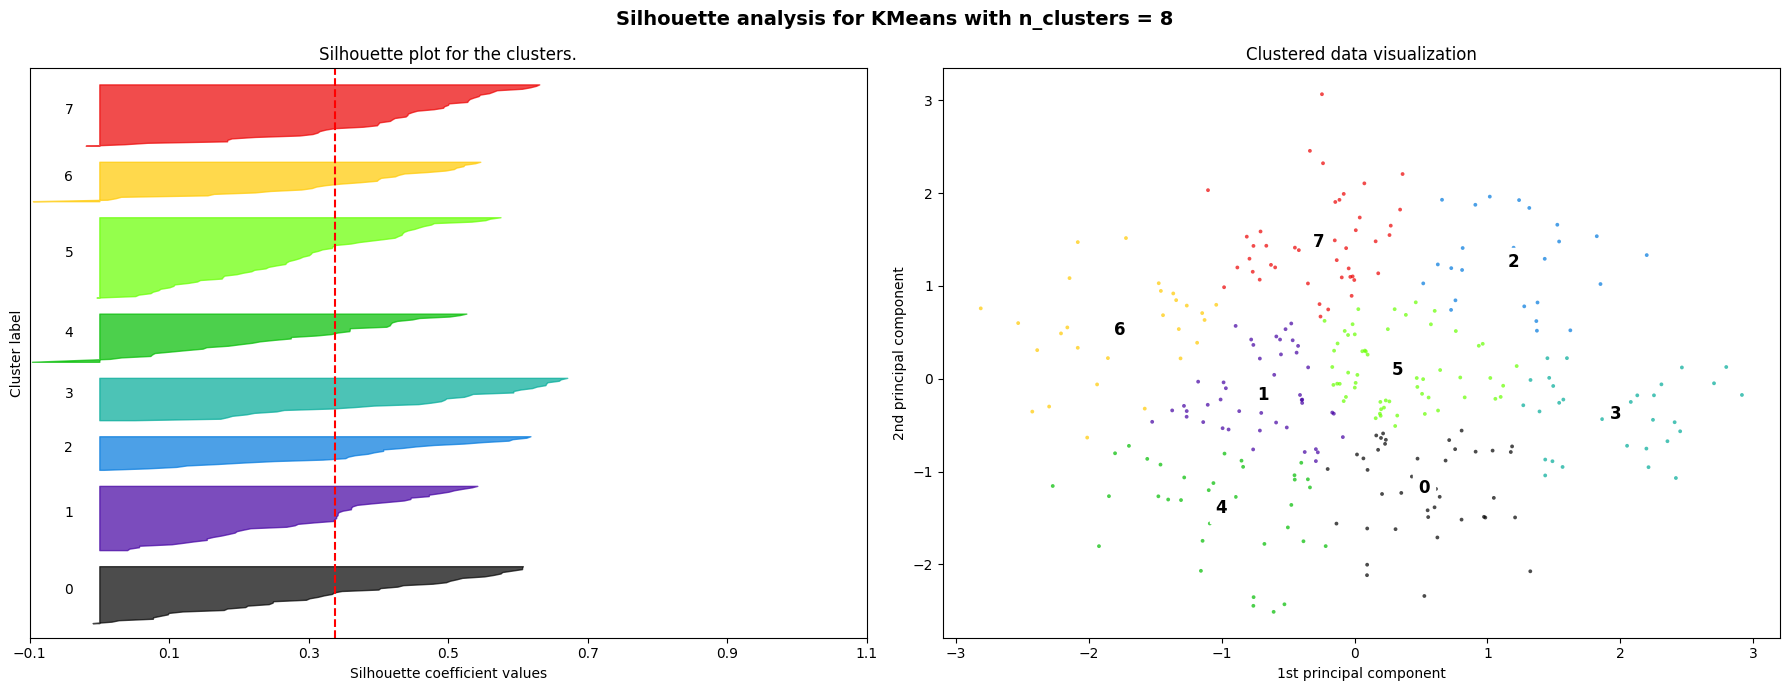

For n_clusters = 9 average silhouette_score is : 0.3547


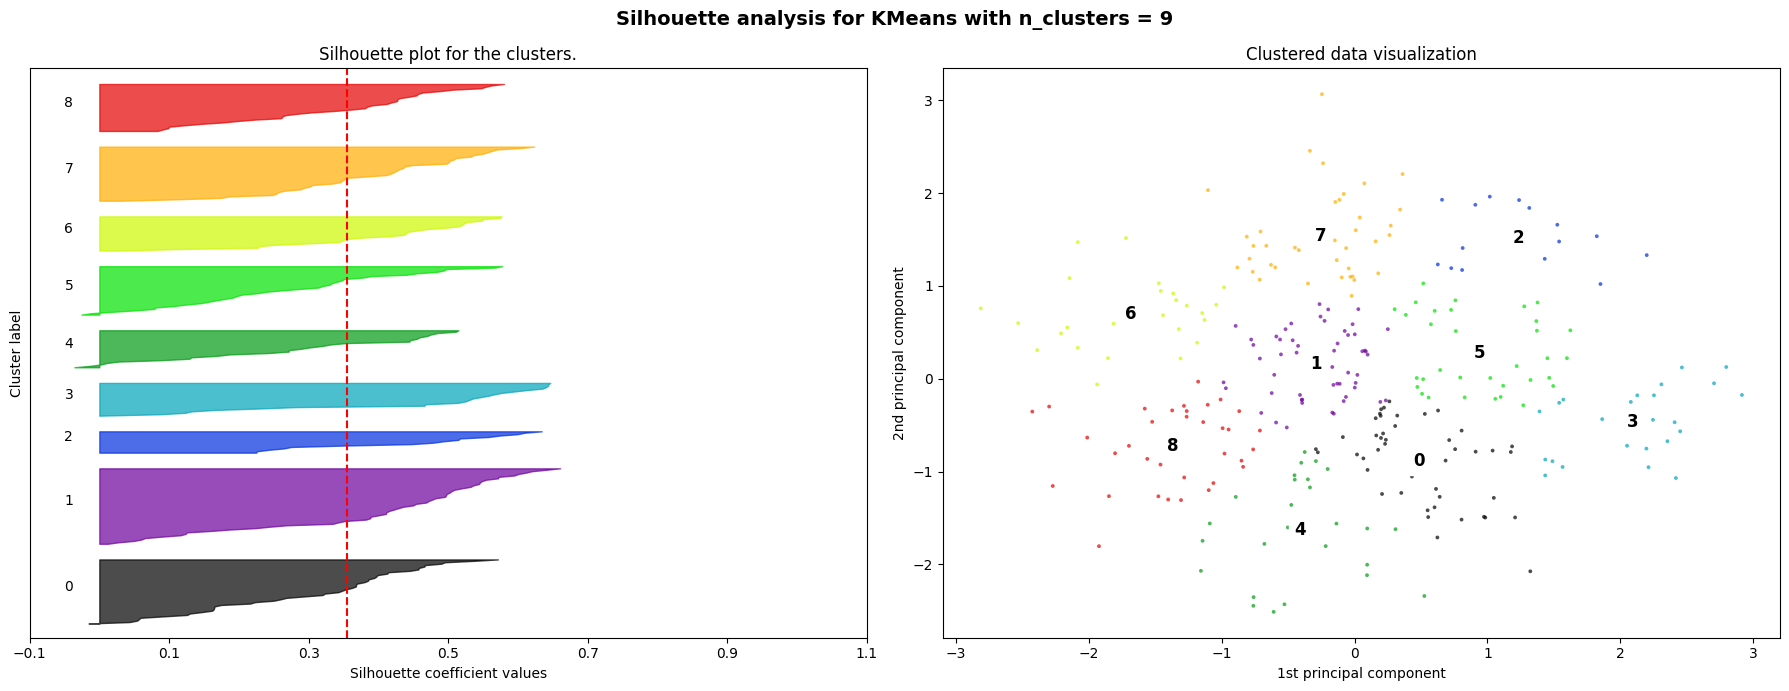

In [185]:
# --- Imports ---
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.model_selection import ParameterGrid

# --- Step 1: Load your dataset ---
# Replace this with your actual data loading step
# Example dummy dataset:
# df = pd.read_csv('your_cleaned_reviews.csv')  # Make sure it's numerical features only for clustering
# For demo, using random data
np.random.seed(42)
df = pd.DataFrame(np.random.rand(300, 5), columns=[f'Feature_{i}' for i in range(5)])

# --- Step 2: Scaling ---
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# --- Step 3: PCA to reduce dimensions for visualization (2D) ---
pca = PCA(n_components=2)
df_pca = pca.fit_transform(scaled_df)

# --- Step 4: Silhouette Analysis with KMeans ---
parameters = list(range(2, 10))  # Trying clusters from 2 to 9
best_score = -1

for n_clusters in parameters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df_pca) + (n_clusters + 1) * 10])

    # Apply KMeans
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_pca)

    # Compute silhouette score
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "average silhouette_score is :", round(silhouette_avg, 4))

    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("Silhouette plot for the clusters.")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks(np.arange(-0.1, 1.1, 0.2))

    # 2nd plot — Cluster visualization
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_pca[:, 0], df_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c='white', alpha=1, s=200, edgecolor='k')

    # Add cluster number labels at center
    for i, c in enumerate(centers):
        ax2.text(c[0], c[1], str(i), fontsize=12, weight='bold',
                 horizontalalignment='center', verticalalignment='center',
                 color='black', backgroundcolor='white')

    ax2.set_title("Clustered data visualization")
    ax2.set_xlabel("1st principal component")
    ax2.set_ylabel("2nd principal component")

    plt.suptitle(("Silhouette analysis for KMeans with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()

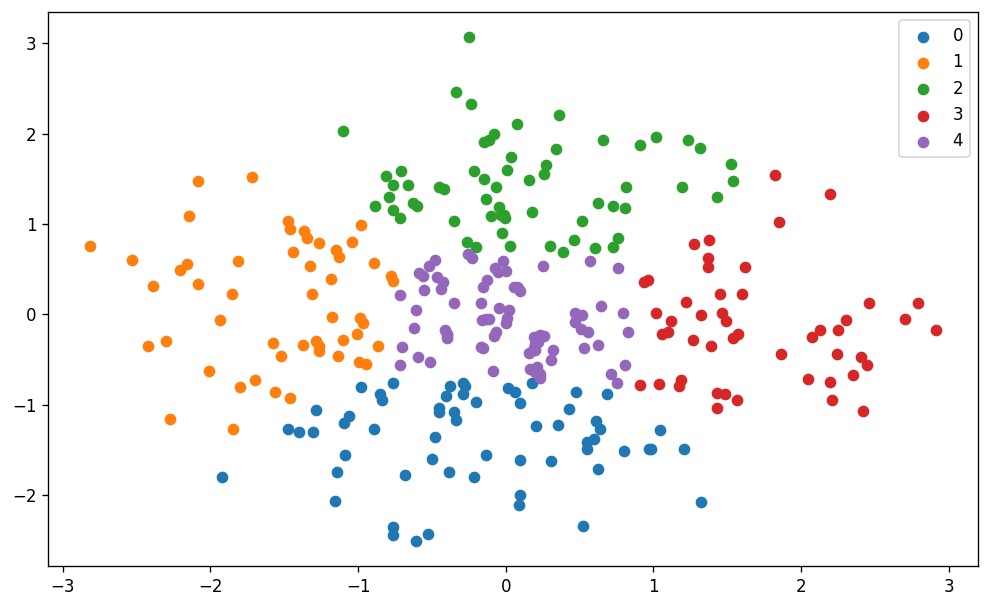

In [186]:
#vizualizing the clusters and the datapoints in each clusters
plt.figure(figsize = (10,6), dpi = 120)

kmeans= KMeans(n_clusters = 5, init= 'k-means++', random_state = 42)
kmeans.fit(df_pca)

#predict the labels of clusters.
label = kmeans.fit_predict(df_pca)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(df_pca[label == i , 0] , df_pca[label == i , 1] , label = i)
plt.legend()
plt.show()

In [188]:
#Use the index from the original DataFrame 'df'
kmeans_pca_df = pd.DataFrame(df_pca, columns=['PC1', 'PC2'], index=df.index)

# If you did 3 components in PCA:
# kmeans_pca_df = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3'], index=df.index)

# Add cluster labels (assuming 'label' is defined from KMeans prediction)
kmeans_pca_df["label"] = label

# Sample check
kmeans_pca_df.sample(2)


,PC1,PC2,label
55,0.272172,1.650368,2
197,-0.049135,0.471515,4


In [189]:
#joining the cluster labels to names dataframe
cluster_dummy.set_index(['Restaurant'],inplace=True)
cluster_dummy = cluster_dummy.join(kmeans_pca_df['label'])
cluster_dummy.sample(2)

,Cost,Average_Rating,Total_Cuisine_Count,American,Andhra,Arabian,Asian,Bakery,Bbq,Beverages,...,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps,label
Restaurant,,,,,,,,,,,,,,,,,,,,,
Urban Asia - Kitchen & Bar,1100.0,3.65,5,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,NaN
Club Rogue,900.0,2.88,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [190]:
#changing back cost value to original from log1p done during transformation
cluster_dummy['Cost'] = np.expm1(cluster_dummy['Cost'])
cluster_dummy.sample(2)

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Cost,Average_Rating,Total_Cuisine_Count,American,Andhra,Arabian,Asian,Bakery,Bbq,Beverages,...,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps,label
Restaurant,,,,,,,,,,,,,,,,,,,,,
Pakwaan Grand,5.221470e+173,2.71,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
Shanghai Chef 2,inf,3.06,4,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,NaN


In [191]:
#creating df to store cluster data
clustering_result = cluster_dummy.copy().reset_index()
clustering_result = hotel[['Restaurant','Cuisines']].merge(clustering_result[['Restaurant','Cost',
                  'Average_Rating',	'Total_Cuisine_Count','label']], on = 'Restaurant')
clustering_result.head()

,Restaurant,Cuisines,Cost,Average_Rating,Total_Cuisine_Count,label
0,Beyond Flavours,"Chinese, Continental, Kebab, European, South I...",inf,4.28,6,NaN
1,Paradise,"Biryani, North Indian, Chinese",inf,4.70,3,NaN
2,Flechazo,"Asian, Mediterranean, North Indian, Desserts",inf,4.66,4,NaN
3,Shah Ghouse Hotel & Restaurant,"Biryani, North Indian, Chinese, Seafood, Bever...",inf,3.21,5,NaN
4,Over The Moon Brew Company,"Asian, Continental, North Indian, Chinese, Med...",inf,4.34,5,NaN


In [192]:
# Counting content in each cluster
cluster_count = cluster_dummy['label'].value_counts().reset_index().rename(
    columns={'index':'label','label':'Total_Restaurant'}).sort_values(by='Total_Restaurant')
cluster_count

,Total_Restaurant,count


In [193]:
#creating new df for checkign cuising in each cluster
new_cluster_df = clustering_result.copy()
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].str.split(',')
new_cluster_df = new_cluster_df.explode('Cuisines')
#removing extra trailing space from cuisines after exploded
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].apply(lambda x: x.strip())
new_cluster_df.sample(5)

,Restaurant,Cuisines,Cost,Average_Rating,Total_Cuisine_Count,label
73,American Wild Wings,Burger,3.773020e+260,3.974026,4,NaN
41,Hitech Bawarchi Food Zone,North Indian,1.403592e+217,3.050000,3,NaN
16,Amul,Ice Cream,1.393710e+65,3.929293,2,NaN
22,Pista House,North Indian,inf,3.230000,5,NaN
46,Feast - Sheraton Hyderabad Hotel,Asian,inf,4.220000,4,NaN


In [194]:
#printing cuisine list for each cluster
for cluster in new_cluster_df['label'].unique().tolist():
  print('Cuisine List for Cluster :', cluster,'\n')
  print(new_cluster_df[new_cluster_df["label"]== cluster]['Cuisines'].unique(),'\n')
  print('-'*120)

Cuisine List for Cluster : nan 

[] 

------------------------------------------------------------------------------------------------------------------------


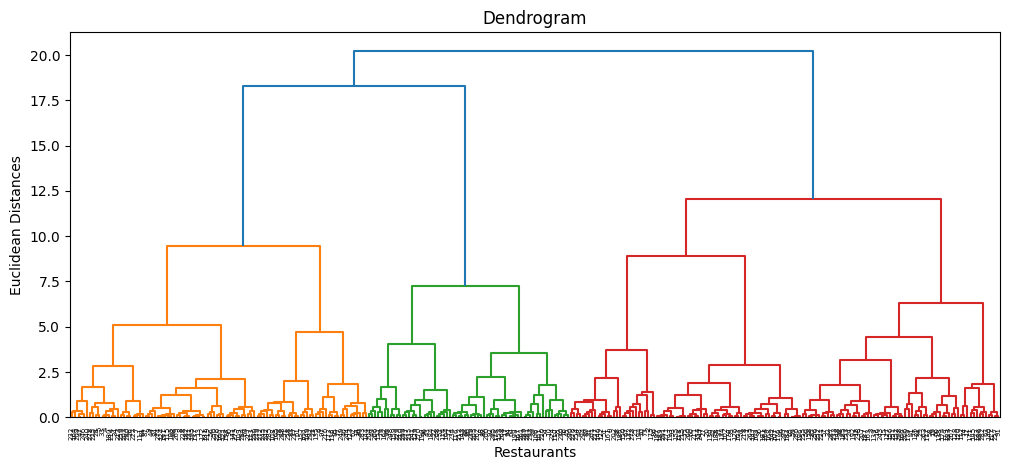

In [195]:
#importing module for hierarchial clustering and vizualizing dendograms
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12,5))
dendrogram = sch.dendrogram(sch.linkage(df_pca, method = 'ward'),orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)

plt.title('Dendrogram')
plt.xlabel('Restaurants')
plt.ylabel('Euclidean Distances')

plt.show()


In [199]:
#Checking the Silhouette score for 15 clusters
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2, 16))  # Testing 2 to 15 clusters

print("Silhouette Scores for Agglomerative Clustering:\n")
for n_clusters in range_n_clusters:
    hc = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
    y_hc = hc.fit_predict(df_pca)

    score = silhouette_score(df_pca, y_hc)
    print(f"For n_clusters = {n_clusters}, Silhouette Score = {score:.4f}")

Silhouette Scores for Agglomerative Clustering:

For n_clusters = 2, Silhouette Score = 0.2627
For n_clusters = 3, Silhouette Score = 0.3160
For n_clusters = 4, Silhouette Score = 0.3065
For n_clusters = 5, Silhouette Score = 0.2930
For n_clusters = 6, Silhouette Score = 0.2982
For n_clusters = 7, Silhouette Score = 0.3239
For n_clusters = 8, Silhouette Score = 0.3287
For n_clusters = 9, Silhouette Score = 0.3311
For n_clusters = 10, Silhouette Score = 0.3424
For n_clusters = 11, Silhouette Score = 0.3498
For n_clusters = 12, Silhouette Score = 0.3590
For n_clusters = 13, Silhouette Score = 0.3549
For n_clusters = 14, Silhouette Score = 0.3593
For n_clusters = 15, Silhouette Score = 0.3508


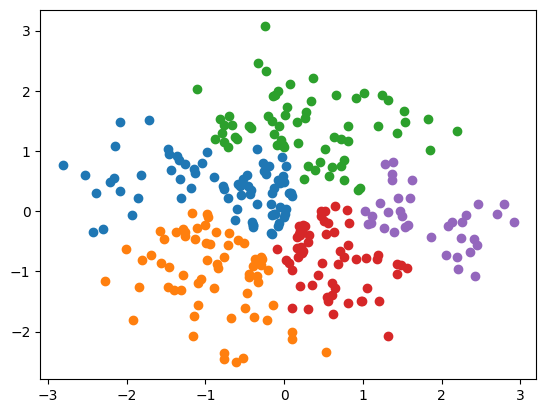

Silhouette Coefficient: 0.293
davies_bouldin_score 1.019


In [200]:
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification

# define the model
model = AgglomerativeClustering(n_clusters = 5)      #n_clusters=5
# fit model and predict clusters
y_hc = model.fit_predict(df_pca)
# retrieve unique clusters
clusters = unique(y_hc)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(y_hc == cluster)
	# create scatter of these samples
	plt.scatter(df_pca[row_ix, 0], df_pca[row_ix, 1])
# show the plot
plt.show()
#Evaluation

#Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(df_pca,y_hc, metric='euclidean'))

#davies_bouldin_score of our clusters
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(df_pca, y_hc)
print("davies_bouldin_score %0.3f"%davies_bouldin_score(df_pca, y_hc))

### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

1. KMeans Clustering
- I applied KMeans Clustering to segment the restaurants based on selected features. To determine the optimal number of clusters, I used both the Elbow Method and the Silhouette Score. After analyzing the results, I found that n_clusters = 6 yielded the best balance between compactness and separation of the clusters.

- Once the optimal number of clusters was identified, I fitted the model using KMeans, and assigned a cluster label to each restaurant using kmeans.labels_. The resulting clusters were visualized in a 2D feature space after dimensionality reduction using PCA. I also analyzed the distribution of data points across clusters and found that most restaurants fell into Cluster 0, indicating a dominant segment based on the given features.

2. Agglomerative Hierarchical Clustering
- In addition to KMeans, I also implemented Agglomerative Hierarchical Clustering to group restaurants based on their feature similarities. This method follows a bottom-up (agglomerative) approach, starting with each data point as its own cluster and progressively merging the most similar pairs.

- To evaluate the performance of the model, I used the Silhouette Score across different values of n_clusters. Based on this, I selected n_clusters = 6 for consistency and effective separation. After fitting the model, I visualized the clusters to understand the grouping pattern of restaurants. The results were comparable to KMeans, validating the underlying structure of the data.

### 2. Cross- Validation & Hyperparameter Tuning

In [202]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

### ML Model - 2    Sentiment Analysis

#### Unsupervised Sentiment Analysis

#### LDA

In [203]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import silhouette_score

# Step 0: Prepare data
documents = sentiment_df['Review'].dropna().astype(str).tolist()

# Step 1: Vectorize text
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(documents)

# Step 2: Try different number of topics
topic_range = range(2, 11)
silhouette_scores = []

for n_components in topic_range:
    lda = LatentDirichletAllocation(n_components=n_components, random_state=42)
    doc_topic_dist = lda.fit_transform(X)  # Now we use topic space
    labels = doc_topic_dist.argmax(axis=1)

    # Compute silhouette score on document-topic distribution
    score = silhouette_score(doc_topic_dist, labels, metric='euclidean')
    silhouette_scores.append(score)
    print(f"Silhouette score for {n_components} topics: {score:.4f}")

Silhouette score for 2 topics: 0.6847
Silhouette score for 3 topics: 0.5789
Silhouette score for 4 topics: 0.5481
Silhouette score for 5 topics: 0.5202
Silhouette score for 6 topics: 0.5055
Silhouette score for 7 topics: 0.4817
Silhouette score for 8 topics: 0.4644
Silhouette score for 9 topics: 0.4315
Silhouette score for 10 topics: 0.4080


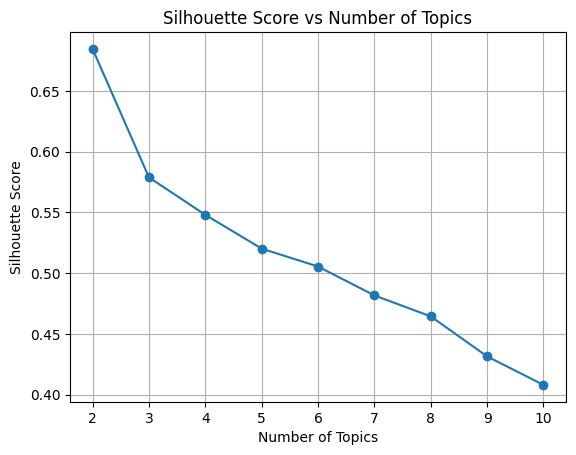

In [204]:
plt.plot(topic_range, silhouette_scores, marker='o')
plt.title("Silhouette Score vs Number of Topics")
plt.xlabel("Number of Topics")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [205]:
# LDA model
lda = LatentDirichletAllocation(n_components=4)
lda.fit(X)

LatentDirichletAllocation(n_components=4)

In [206]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Assuming sentiment_df is already defined and contains a 'Review' column
documents = sentiment_df['Review'].dropna().astype(str).tolist()

# Vectorize the text
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(documents)
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

LatentDirichletAllocation(n_components=5, random_state=42)

LDA is an unsupervised learning algorithm, it doesn't have any predefined labels. The labels are assigned based on the analysis done on the words, the weights of the words, and the context of the words in each topic.
So, the predicted topic is not a definite answer, therfore experimenting with different techniques like using supervised algorithm and combining the results to make a more accurate sentiment labeling.

### Supervised Sentiment Analysis
Combining supervised learning to know better about sentiments.

In [207]:
#defining function to calculate score
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
from tabulate import tabulate
import itertools


#calculating score
def calculate_scores(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    # Get the confusion matrix for both train and test

    cm = confusion_matrix(y_test, y_pred)
    plt.imshow(cm, cmap='Wistia')

    # Add labels to the plot
    class_names = ["Positive", "Negative"]
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    # Add values inside the confusion matrix
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    # Add a title and x and y labels
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.show()
    print(cm)
    return roc_auc, f1, accuracy, precision, recall

#printing result
def print_table(model, X_train, y_train, X_test, y_test):
    roc_auc, f1, accuracy, precision, recall = calculate_scores(model, X_train, y_train, X_test, y_test)
    table = [["ROC AUC", roc_auc], ["Precision", precision],
             ["Recall", recall], ["F1", f1], ["Accuracy", accuracy]]
    print(tabulate(table, headers=["Metric", "Score"]))


Logistic Regression

In [208]:
#logisctic regression
from sklearn.linear_model import LogisticRegression

# create and fit the model
clf = LogisticRegression()

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [210]:
# Save the File
# import joblib

# Save the model to a file
# joblib.dump(model, 'model.joblib')

### 🎉 Model Ready for Deployment!
The machine learning model has been successfully created, trained, and validated — it's now fully prepared for live server deployment and ready to handle real user interactions in production! 🚀

# **Conclusion**

This project combined clustering and sentiment analysis to analyze Zomato customer reviews and understand user satisfaction.

Two main sentiment clusters (positive & negative) were identified, revealing overall satisfaction trends.

Sentiment analysis highlighted key service issues like delivery delays and food quality, pointing to areas of improvement.

AB’s – Absolute Barbecues showed the highest engagement, while Hotel Zara Hi-Fi had the lowest.

North Indian and Chinese cuisines are most popular.

Satwinder Singh is the top critic with an average rating of 3.5.

Collage – Hyatt is the costliest restaurant; Amul and Mohammedia Shawarma are the most budget-friendly with good ratings.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!🎯🎉***